<a href="https://colab.research.google.com/github/vzeizer/CyberSec_SuspiciousIPs/blob/master/CyberSec_IPs_Suspeitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing and upgrading gdown to download files from Google Drive
#!pip install --upgrade gdown

In [ ]:
# pandas e numpy para cálculos numéricos
# Imports
import numpy as np
import pandas as pd
# matplotlib e seaborn para gráficos
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 250)# random para aleatoriedade
import random

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer
# LabelBinarizer ->
from sklearn.preprocessing import LabelBinarizer
# train_test_split para separar as imagens em treino e teste
from sklearn.model_selection import train_test_split
# dois imports com relação às métricas de classificação
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# imutils para tarefas comuns em visão computacional e processamento de imagens

from imutils import paths
# shutil ->
import shutil
# os to deal with operation system stuffs
import os

# gdown for downloading Google Drive stored Files
from gdown import download

In [ ]:
# the file_id and the composed URL https://drive.google.com/file/d/1NZ03lAljlkrfWxx46zQluhoGdVP6Ojtn/view?usp=sharing
file_id = '1NZ03lAljlkrfWxx46zQluhoGdVP6Ojtn'  # Replace with the actual file ID
url = f'https://drive.google.com/uc?export=download&id={file_id}'
# downloading the file through the URL and naming it as file.zip
download(url, 'dataset.csv')  # Replace 'filename.ext' with your desired name

Downloading...
From: https://drive.google.com/uc?export=download&id=1NZ03lAljlkrfWxx46zQluhoGdVP6Ojtn
To: /content/dataset.csv
100%|██████████| 16.9M/16.9M [00:00<00:00, 191MB/s]


'dataset.csv'

In [ ]:
# As colunas estão separadas por espaço -> delim_whitespace
dados = pd.read_csv('/content/dataset.csv', delim_whitespace = True)

<ipython-input-766-2eb75335adb8>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dados = pd.read_csv('/content/dataset.csv', delim_whitespace = True)


In [ ]:
print(list(dados.columns))

['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query', 's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)', 'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken']


Here's the data dictionary for the given features of the dataset:

1. `date`: The date of the event.
2. `time`: The time of the event.
3. `s-ip`: The source IP address.
4. `cs-method`: The HTTP request method (e.g., GET, POST).
5. `cs-uri-stem`: The URI stem of the requested resource.
6. `cs-uri-query`: The query string portion of the URI.
7. `s-port`: The source port number.
8. `cs-username`: The username associated with the request (if applicable).
9. `c-ip`: The client IP address.
10. `cs(User-Agent)`: The user-agent string of the client's browser or application.
11. `cs(Referer)`: The referer URL, indicating the page that referred the client to the current page.
12. `sc-status`: The HTTP status code returned by the server.
13. `sc-substatus`: The HTTP substatus code.
14. `sc-win32-status`: The Windows status code.
15. `time-taken`: The time taken to process the request.

This data dictionary provides a description for each feature in your dataset, helping you understand the meaning and purpose of each column.

In [ ]:
dados.shape

(70315, 15)

In [ ]:
dados.sample(5)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
10080,2022-01-05,16:12:34,57.222.145.109,GET,jdpfcvmg.css,-,443,cq328786,81.91.96.103,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/transactions.aspx,200,0,0,20
7338,2022-01-04,10:38:15,57.222.145.109,GET,favico.ico,-,443,-,185.38.202.192,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/transactions.aspx,200,0,0,27
27554,2022-01-12,20:21:39,57.222.145.109,GET,uoqbzdls.js,v=558300,443,tr754285,91.232.208.11,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/transactions.aspx,200,0,0,28
30471,2022-01-14,08:54:26,57.222.145.109,GET,main.css,-,443,zi891180,193.150.34.58,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+13_4_1+like...,https://bankofpunk.local/login.aspx,200,0,0,23
32207,2022-01-15,00:17:00,57.222.145.109,GET,qfacsunf.css,-,443,-,54.182.240.182,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_0+like+M...,-,200,0,0,30


### Análise 1 - Proxy Users Analysis (**cs(User-Agent)**)

O objetivo do campo **cs(User-Agent)** é especificar informações sobre o aplicativo cliente que está enviando a mensagem ao servidor web.

O campo cs(User-Agent) deve ser definido com o mesmo valor que o navegador web especifica no cabeçalho do **protocolo HTTP**. O campo pode ser definido de forma diferente, desde que siga a sintaxe **ABNF**.

Se uma mensagem for encaminhada por um proxy, o campo **cs(User-Agent)** deve começar com a string **"_via_"**. O valor original especificado pelo cliente (que pode ser outro proxy) no campo cs(User-Agent) deve ser descartado. O proxy deve incluir um token no campo cs(User-Agent) que especifica **a marca e a versão do proxy**.

Vamos analisar a coluna **cs(User-Agent)** a fim de verificar se há algum uso de proxy ou não. **Qualquer mensagem de login encaminhada pelo proxy, a palavra-chave '_via_' deve estar lá.**

In [ ]:
# Cria um dataframe vazio
analise1 = pd.DataFrame()

In [ ]:
# Preenche o dataframe com o filtro no dataframe original buscando valores únicos na coluna.
analise1["cs(User-Agent)"] = pd.DataFrame(dados['cs(User-Agent)'].unique())

In [ ]:
analise1

,cs(User-Agent)
0,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...
1,Mozilla/5.0+(Windows+NT+10.0)+AppleWebKit/537....
2,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...
3,Mozilla/5.0+(compatible;+MSIE+10.0;+Windows+NT...
4,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...
5,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_1_4+like...
6,Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+...
7,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...
8,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...
9,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...


In [ ]:
# Visualiza os cinco primeiros
analise1.head(5)

,cs(User-Agent)
0,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...
1,Mozilla/5.0+(Windows+NT+10.0)+AppleWebKit/537....
2,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...
3,Mozilla/5.0+(compatible;+MSIE+10.0;+Windows+NT...
4,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...


In [ ]:
# Filtra se há uso de proxy
analise1["Proxy_user"] = pd.DataFrame(dados['cs(User-Agent)'].str.contains("_via_"))

In [ ]:
analise1.sample(5)

,cs(User-Agent),Proxy_user
73,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,False
62,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,False
144,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,False
146,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,False
109,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,False


In [ ]:
analise1["Proxy_user"].value_counts()

,count
Proxy_user,
False,152


### Análise 2 - Anonymous Users Analysis

Vamos analisar o campo **cs-username**. Esse campo traz o nome do usuário acessando o servidor e **se não for um usuário autenticado, será representado por um hífen.**

Nesta análise a coluna **cs-username** será verificada para ver se existem usuários não autenticados, observando "-".

In [ ]:
dados.sample(5)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
21850,2022-01-10,12:00:07,57.222.145.109,GET,index.aspx,-,443,-,185.245.213.201,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://bankofpunk.local/index.aspx,200,0,0,20
44855,2022-01-20,10:59:39,57.222.145.109,GET,lkcgytku.css,-,443,-,196.52.3.105,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_3+like+M...,https://bankofpunk.local/index.aspx,404,0,0,21
68001,2022-01-29,23:28:30,57.222.145.109,GET,bcqyypnu.css,-,443,-,147.243.249.50,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+13_3+like+M...,https://bankofpunk.local/index.aspx,200,0,0,26
46399,2022-01-20,22:01:37,57.222.145.109,GET,transactions.aspx,page=3,443,zk957674,172.111.208.95,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/transactions.aspx,200,0,0,27
25238,2022-01-11,20:42:00,57.222.145.109,GET,footer.css,-,443,-,194.10.26.175,Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+...,-,200,0,0,28


In [ ]:
# Cria um dataframe vazio
analise2 = pd.DataFrame()
# Preenche o dataframe com o filtro no dataframe original buscando valores únicos na coluna.
analise2["cs-username"] = pd.DataFrame(dados['cs-username'].unique())
analise2.sample(5)

,cs-username
120,xu236985
986,gr216329
503,nu426705
856,id565843
293,xi657514


In [ ]:
analise2['cs-username'].value_counts()

,count
cs-username,
-,1
yr444353,1
oc438139,1
ie423557,1
kz259654,1
...,...
ps340612,1
iu585137,1
yx129339,1


In [ ]:
# Aplicamos o filtro e sobrescrevemos o dataframe analise2
analise2 = dados[dados['cs-username'].str.contains("-")]
# Total de acessos de usuários não autenticados
analise2['cs-username'].value_counts()

,count
cs-username,
-,27500


In [ ]:
# Visualiza uma amostra dos acessos de usuários não autenticados
analise2.sample(5)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
65126,2022-01-29,05:55:19,57.222.145.109,GET,index.aspx,-,443,-,212.222.160.130,Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+...,https://bankofpunk.local/index.aspx,200,0,0,28
18781,2022-01-09,07:16:28,57.222.145.109,GET,footer.css,-,443,-,185.139.143.78,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,27
10027,2022-01-05,15:49:52,57.222.145.109,GET,cgxilpzk.css,-,443,-,185.189.57.162,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_0_1+like...,https://bankofpunk.local/index.aspx,404,0,0,26
30824,2022-01-14,10:58:00,57.222.145.109,GET,dxdgcmgu.js,v=809552,443,-,209.204.241.116,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,21
59073,2022-01-26,09:28:10,57.222.145.109,GET,index.aspx,-,443,-,5.181.99.34,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_0+like+M...,https://bankofpunk.local/index.aspx,301,0,0,25


### Resultado da Análise:

O total de acessos de usuários não autenticados é baixo em relação ao total de acessos. Como isso não é garantia de acesso não suspeito ou malicioso, vamos seguir investigando.

### Análise 3 - Número de Solicitações Por IP do Cliente

**Quais endereços IP de clientes tiveram maior volume de acessos**? Isso pode indicar eventuais problemas ou anomalias.

Usando value_counts(), vamos tentar descobrir qualquer número incomum de solicitações de IPs de clientes. As contagens são representadas em ordem decrescente. Usaremos a coluna **c-ip** (**client IP**).

In [ ]:
analise3 = pd.DataFrame()
analise3["Count-Client-IP"] = pd.value_counts(dados['c-ip']).head(10)

<ipython-input-782-998f1d3b25cf>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  analise3["Count-Client-IP"] = pd.value_counts(dados['c-ip']).head(10)


In [ ]:
analise3

,Count-Client-IP
c-ip,
103.211.182.34,244
217.15.114.98,144
82.206.244.38,143
185.97.213.168,141
16.8.69.88,139
195.21.5.206,139
83.133.30.32,136
83.151.197.83,135
57.64.50.208,134


In [ ]:
print(rf"Os IPs com maior número de acessos são: ",list(analise3.index)[:5])

Os IPs com maior número de acessos são:  ['103.211.182.34', '217.15.114.98', '82.206.244.38', '185.97.213.168', '16.8.69.88']


### Resultado da Análise:

A partir da tabela acima observamos que o IP **103.211.182.34** tem o maior número de interações com o servidor.

Vamos investigar os IPs com maior volume de acesso em mais detalhes.

In [ ]:
analise3_ip1 = dados[dados['c-ip'].str.contains("103.211.182.34")]
analise3_ip1.head(20)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
66387,2022-01-29,13:44:00,57.222.145.109,GET,eiownzdh.css,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,200,0,0,20
66388,2022-01-29,13:44:00,57.222.145.109,GET,index.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,301,0,0,29
66393,2022-01-29,13:44:16,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/index.aspx,401,0,0,23
66394,2022-01-29,13:44:19,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,26
66395,2022-01-29,13:44:22,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,28
66396,2022-01-29,13:44:24,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,27
66397,2022-01-29,13:44:27,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,27
66398,2022-01-29,13:44:30,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,30
66399,2022-01-29,13:44:31,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,20
66400,2022-01-29,13:44:33,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,20


In [ ]:
analise3_ip1[['cs-method','s-port','sc-status']].value_counts(normalize=True)

cs-method  s-port  sc-status
POST       443     401          0.709016
GET        443     200          0.233607
POST       443     200          0.024590
GET        443     404          0.020492
                   301          0.008197
POST       443     301          0.004098
Name: proportion, dtype: float64

In [ ]:
analise3_ip1['cs-method'].value_counts(normalize=True)

,proportion
cs-method,
POST,0.737705
GET,0.262295


In [ ]:
analise3_ip1['s-port'].value_counts(normalize=True)

,proportion
s-port,
443,1.0


In [ ]:
analise3_ip1['sc-status'].value_counts(normalize=True)

,proportion
sc-status,
401,0.709016
200,0.258197
404,0.020492
301,0.012295


In [ ]:
analise3_ip1['time-taken'].value_counts(normalize=True)

,proportion
time-taken,
28,0.122951
27,0.122951
26,0.106557
24,0.106557
23,0.098361
20,0.094262
30,0.086066
21,0.081967
22,0.073770


<Axes: ylabel='time-taken'>

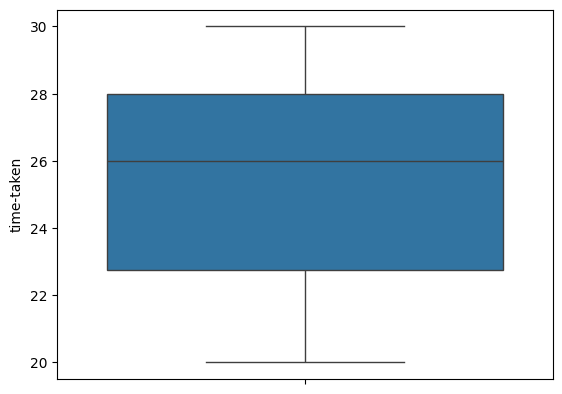

In [ ]:
sns.boxplot(data = analise3_ip1,y='time-taken')

<Axes: ylabel='time-taken'>

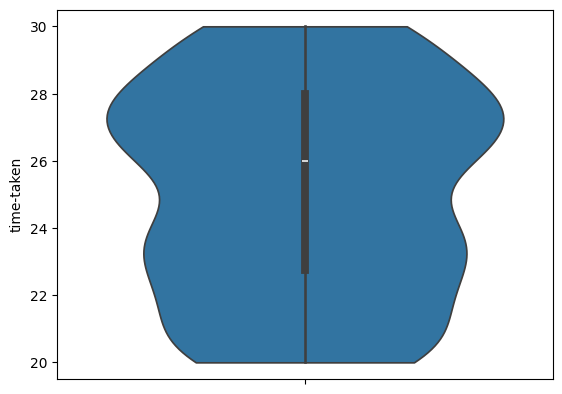

In [ ]:
sns.violinplot(data = analise3_ip1,y='time-taken',cut=0)

<Axes: xlabel='cs-method', ylabel='time-taken'>

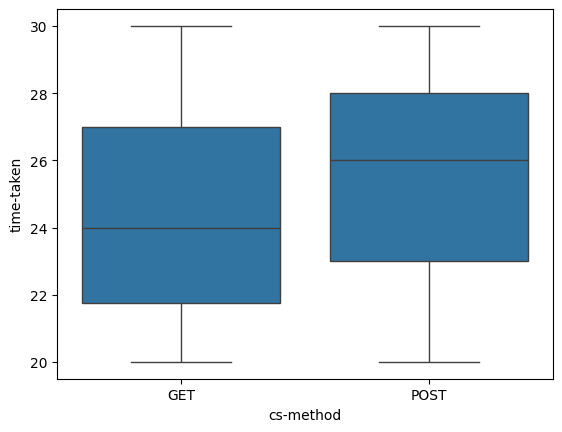

In [ ]:
sns.boxplot(data = analise3_ip1,y='time-taken',x='cs-method')

In [ ]:
analise3_ip1.columns

Index(['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

<Axes: xlabel='sc-status', ylabel='time-taken'>

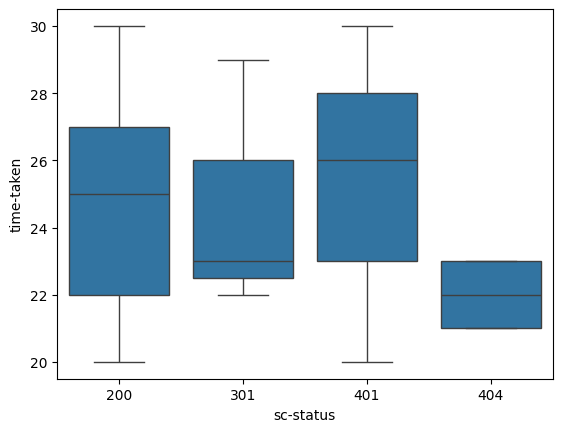

In [ ]:
sns.boxplot(data = analise3_ip1,y='time-taken',x='sc-status')

<Axes: xlabel='sc-substatus', ylabel='time-taken'>

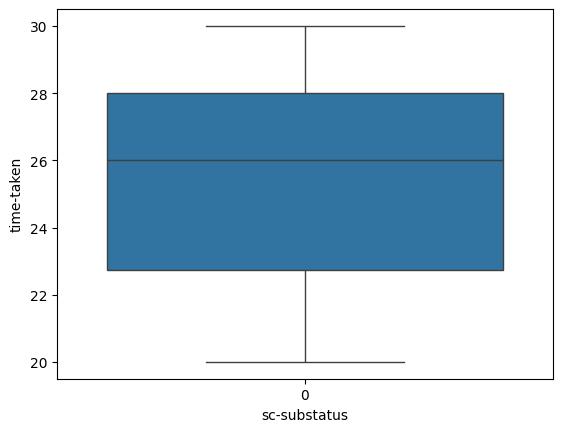

In [ ]:
sns.boxplot(data = analise3_ip1,y='time-taken',x='sc-substatus')

<Axes: xlabel='sc-win32-status', ylabel='time-taken'>

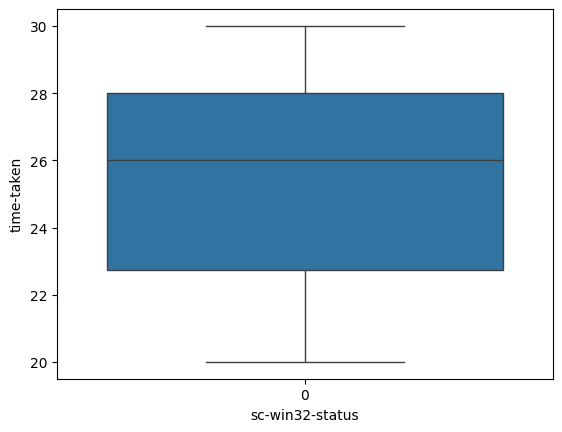

In [ ]:
sns.boxplot(data = analise3_ip1,y='time-taken',x='sc-win32-status')

### Resultado da Análise:

Vários métodos <b>POST</b> na coluna <b>cs-method</b> podem ser observados durante a análise do c-ip <b>103.211.182.34</b> onde <b>cs-uri-stem</b> é <b>login.aspx</b> e a maioria dos <b>sc-status</b> são <b>401</b>.

**O código de status de resposta não autorizada 401 do HyperText Transfer Protocol (HTTP) indica que a solicitação do cliente não foi concluída porque não possui credenciais de autenticação válidas para o recurso solicitado.**

Durante um período de tempo muito curto (entre 13:44:16 e 13:49:54), esse volume de requisições de métodos <b>POST</b> em <b>login.aspx</b> parece suspeito.

In [ ]:
analise3_ip2 = dados[dados['c-ip'].str.contains("217.15.114.98")]
analise3_ip2.head(20)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
31159,2022-01-14,13:51:00,57.222.145.109,GET,template.css,v=ogftkdfg,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,-,200,0,0,23
31160,2022-01-14,13:51:00,57.222.145.109,GET,iztyzubx.js,v=724159,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,-,200,0,0,30
31161,2022-01-14,13:51:00,57.222.145.109,GET,favico.ico,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,-,200,0,0,23
31162,2022-01-14,13:51:00,57.222.145.109,GET,index.aspx,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,-,200,0,0,21
31163,2022-01-14,13:51:07,57.222.145.109,GET,pjkvkshx.css,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,404,0,0,26
31164,2022-01-14,13:51:07,57.222.145.109,GET,rdzwevzx.css,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,200,0,0,27
31165,2022-01-14,13:51:07,57.222.145.109,GET,index.aspx,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,200,0,0,26
31166,2022-01-14,13:51:23,57.222.145.109,GET,uwnlhdwe.css,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,200,0,0,27
31167,2022-01-14,13:51:23,57.222.145.109,GET,phvzqtes.css,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,404,0,0,24
31168,2022-01-14,13:51:23,57.222.145.109,GET,cdgxrwsy.css,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,404,0,0,23


In [ ]:
analise3_ip2.shape

(144, 15)

In [ ]:
analise3_ip2['cs-method'].value_counts(normalize=True)

,proportion
cs-method,
GET,0.951389
POST,0.048611


In [ ]:
analise3_ip1['s-port'].value_counts(normalize=True)

,proportion
s-port,
443,1.0


In [ ]:
# o que cada um desses números significam?
analise3_ip1['sc-status'].value_counts(normalize=True)

,proportion
sc-status,
401,0.709016
200,0.258197
404,0.020492
301,0.012295


### Resultado da Análise:

Para o segundo cip mais alto <b>217.15.114.98</b>, o padrão não é o mesmo.

A principal conclusão a partir daqui é focar melhor em **cs-method** e **sc-status** especificamente onde o valor é <b>POST ou 401</b>, respectivamente.

### Análise 4 - Conexões Por Status e Método

Vamos entender os diferentes tipos de <b>sc-status</b> e <b>cs-method</b> do conjunto de dados, com a função value_counts().

In [ ]:
analise4_scstatus = pd.DataFrame()
analise4_scstatus["sc-status_Count"] = (dados['sc-status'].value_counts())
analise4_scstatus

,sc-status_Count
sc-status,
200,59070
404,5909
301,4653
401,683


<Axes: ylabel='sc-status'>

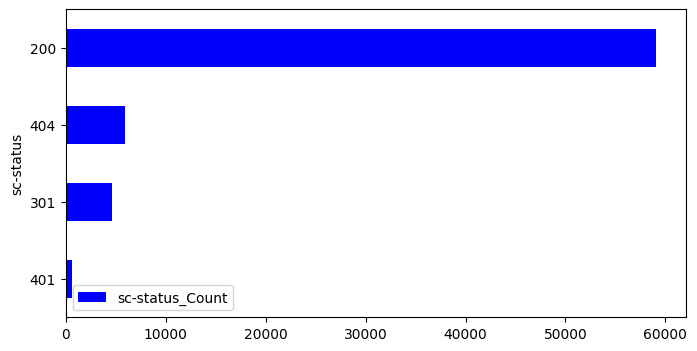

In [ ]:
# Plot
analise4_scstatus.sort_values(by=['sc-status_Count']).plot(kind = 'barh',
                       figsize = (8,4),
                       color = 'blue')

### Resultado da Análise:

Existem 4 tipos de **sc-status** existentes no conjunto de dados.

O sc-status **200** refere-se aos pedidos aceitos com sucesso pelo servidor. Era esperado que esse status seja o que tenha maior volume nos dados.

Códigos **400** indicam que **ocorreu um erro** onde **404** refere-se à causa mais específica de um erro, como não encontrado e **401** refere-se ao acesso negado.

O código de resposta de status **301** indica que o recurso solicitado foi definitivamente movido para a URL fornecida pelos cabeçalhos. Um navegador redireciona para a nova URL e os mecanismos de pesquisa atualizam seus links para o recurso.

In [ ]:
analise4_csmethod = pd.DataFrame()
analise4_csmethod["cs-method_Counts"] = pd.DataFrame(dados['cs-method'].value_counts())
analise4_csmethod

,cs-method_Counts
cs-method,
GET,67202
POST,3113


### Resultado da Análise:

Basicamente, POST é usado para enviar dados para um servidor e GET é usado para solicitar dados de um recurso especificado. Alto volume de requisições POST em um curto espaço de tempo podem indicar acesso suspeito.

### Análise 5 - Verificando Conexões do Tipo POST
Vamos remover algumas colunas do dataset e então analisar os acessos com requisições de método POST.

In [ ]:
df_filtro = pd.DataFrame(dados)
df_filtro.drop(["s-ip",
                "s-port",
                "cs(User-Agent)",
                "cs(Referer)",
                "sc-substatus",
                "sc-win32-status"], axis = 1,
               inplace = True)
#Vamos filtrar os acessos com requisições de método POST e fazer um agrupamento por endereço ip do cliente.
analise5 = df_filtro.loc[df_filtro['cs-method'] == 'POST'].groupby(pd.Grouper(key = 'c-ip', axis=0))['cs-method'].value_counts().reset_index(name = 'Counts')
analise5.sort_values(by = "Counts", ascending = False).head(10)

<ipython-input-806-e53000b51a5e>:10: FutureWarning: Grouper axis keyword is deprecated and will be removed in a future version. To group on axis=1, use obj.T.groupby(...) instead
  analise5 = df_filtro.loc[df_filtro['cs-method'] == 'POST'].groupby(pd.Grouper(key = 'c-ip', axis=0))['cs-method'].value_counts().reset_index(name = 'Counts')


,c-ip,cs-method,Counts
1,103.211.182.34,POST,180
746,45.84.89.130,POST,67
127,160.116.57.249,POST,46
424,194.12.8.149,POST,11
315,185.97.213.168,POST,10
369,193.164.167.94,POST,10
95,154.14.15.237,POST,9
604,212.165.134.126,POST,8
388,193.24.26.211,POST,8
906,82.206.244.38,POST,8


<Axes: xlabel='c-ip'>

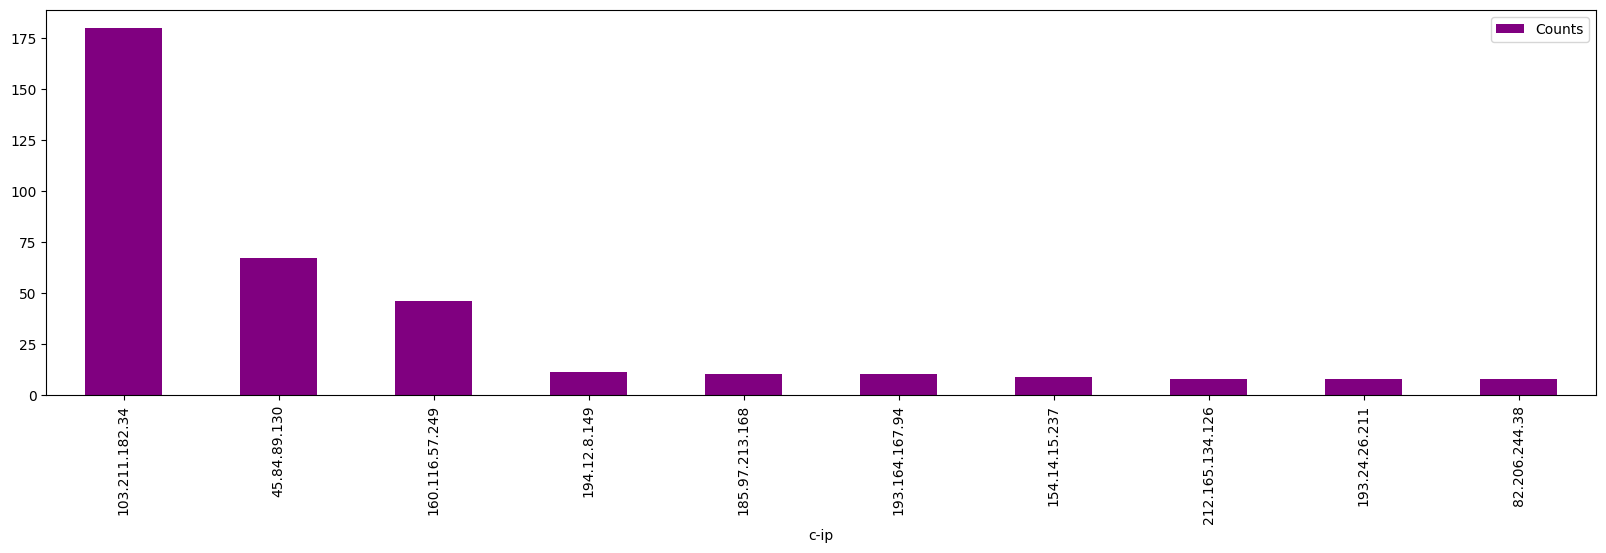

In [ ]:
# Plot
analise5.sort_values(by = "Counts",
                     ascending = False).head(10).plot(x = 'c-ip',
                                                      y = 'Counts',
                                                      kind = 'bar',
                                                      figsize = (20,5),
                                                      color = 'purple')

### Resultado da Análise:

O gráfico mostra que 3 endereços ip foram os que tiveram maior número de acessos com requisições de método POST. Isso indica tentativa de login por força bruta para obter username e/ou senha. Vamos analisar isso em mais detalhes para a página **login.aspx**.

### Análise 6 - Verificando Tentativa de Login Por Força Bruta

Vamos verificar se está havendo tentativa de login por força bruta. Usaremos o dataframe df_filtro do item anterior como ponto de partida.

In [ ]:
analise6 = df_filtro.loc[df_filtro['cs-uri-stem'] == 'login.aspx'].groupby(pd.Grouper(key = 'c-ip',
                                                                                    axis = 0))['cs-uri-stem'].value_counts().reset_index(name = 'Counts')

<ipython-input-808-6f6ff2e507be>:1: FutureWarning: Grouper axis keyword is deprecated and will be removed in a future version. To group on axis=1, use obj.T.groupby(...) instead
  analise6 = df_filtro.loc[df_filtro['cs-uri-stem'] == 'login.aspx'].groupby(pd.Grouper(key = 'c-ip',


In [ ]:
analise6.sort_values(by = "Counts", ascending = False).head(10)

,c-ip,cs-uri-stem,Counts
1,103.211.182.34,login.aspx,174
746,45.84.89.130,login.aspx,61
127,160.116.57.249,login.aspx,40
424,194.12.8.149,login.aspx,12
369,193.164.167.94,login.aspx,12
95,154.14.15.237,login.aspx,11
583,207.117.196.232,login.aspx,10
388,193.24.26.211,login.aspx,10
801,57.246.165.107,login.aspx,10
315,185.97.213.168,login.aspx,10


<Axes: xlabel='c-ip'>

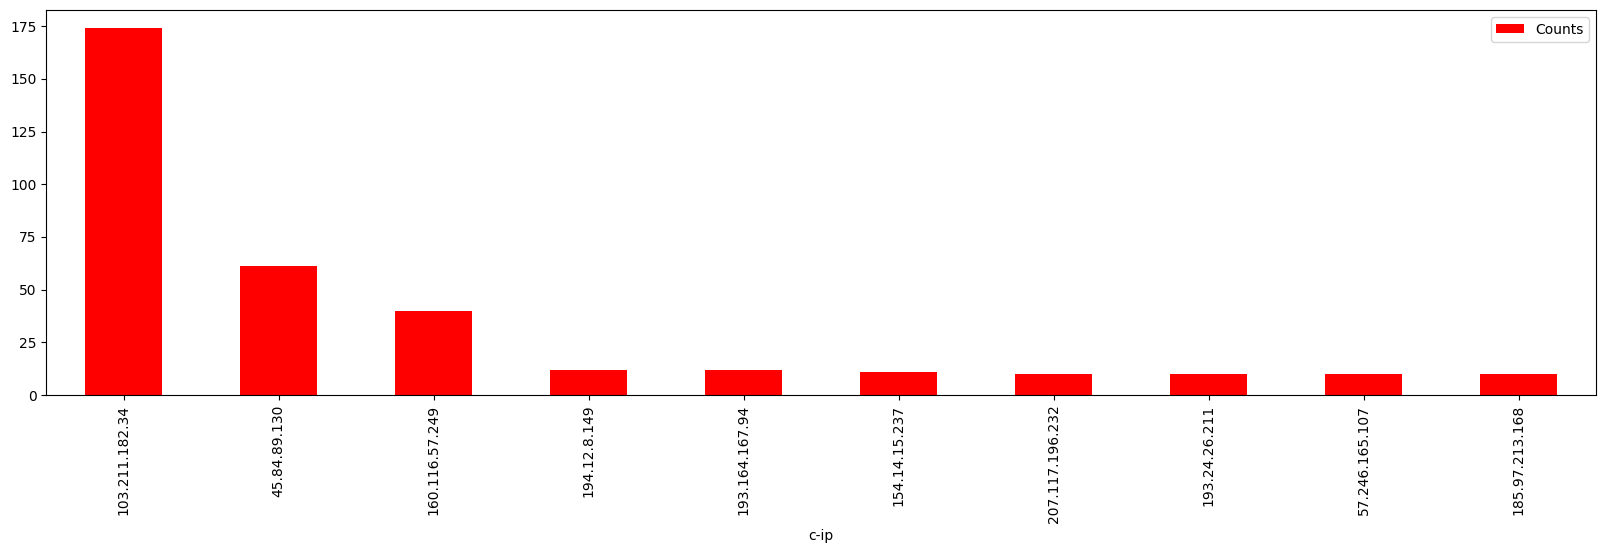

In [ ]:
# Plot
analise6.sort_values(by = "Counts",
                     ascending = False).head(10).plot(x = 'c-ip',
                                                      y = 'Counts',
                                                      kind = 'bar',
                                                      figsize = (20,5),
                                                      color = 'red')

### Resultado da Análise:

O alto volume de acessos com requisição via **método POST** vem de 3 endereços IP. E as requisições são direcionadas para a **página login.aspx**. Isso indica que estão tentando acessar a página até descobrir as credenciais de acesso. Claramente, **tentativa de acesso por força bruta**.

### Análise 7 - Página com Maior Número de Acessos com Status 401

Para os endereços IP com maior volume de acessos, vamos verificar qual página recebeu maior número de acessos com status 401. Usaremos o dataframe df_filtro do item anterior como ponto de partida.

In [ ]:
analise7_ip1 = df_filtro.loc[df_filtro['c-ip'] == '103.211.182.34'].groupby(by = ['cs-uri-stem'])['sc-status'].value_counts().reset_index(name='Counts').head().sort_values(by = "Counts",
                                                                                         ascending = False).head()


In [ ]:
analise7_ip1

,cs-uri-stem,sc-status,Counts
0,acqzztac.css,404,1
1,begwrrhe.js,200,1
2,cryojxhn.css,200,1
3,cxrorsvg.css,404,1
4,eiownzdh.css,200,1


<Axes: xlabel='sc-status'>

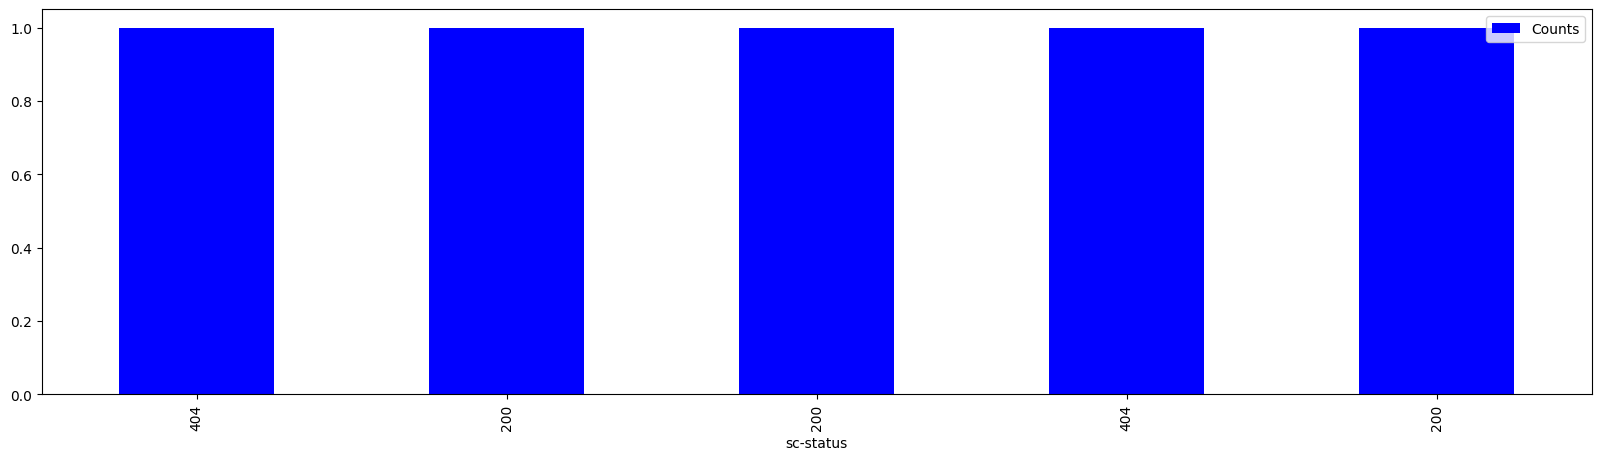

In [ ]:
# Plot
analise7_ip1.plot(x = 'sc-status',
              y = 'Counts',
              kind = 'bar',
              figsize = (20,5),
              color = 'blue')

### Resultado da Análise:

O **c-ip = 103.211.182.34** acessou a página login.aspx 173 vezes em um curto período de tempo, o que indica, claramente, que um ataque de força bruta foi lançado aqui. Este é o primeiro c-ip suspeito.

Vamos repetir a análise para o segundo ip com maior volume de acessos via método POST.

In [ ]:
# para o segund ip (c-ip)
analise7_ip2 = df_filtro.loc[df_filtro['c-ip'] == '45.84.89.130'].groupby(pd.Grouper(key = 'cs-uri-stem',
                                                                                     axis = 0))['sc-status'].value_counts().reset_index(name='Counts').head().sort_values(by = "Counts",
                                                                                     ascending = False).head()

<ipython-input-814-c79c39d64a32>:2: FutureWarning: Grouper axis keyword is deprecated and will be removed in a future version. To group on axis=1, use obj.T.groupby(...) instead
  analise7_ip2 = df_filtro.loc[df_filtro['c-ip'] == '45.84.89.130'].groupby(pd.Grouper(key = 'cs-uri-stem',


<Axes: ylabel='sc-status'>

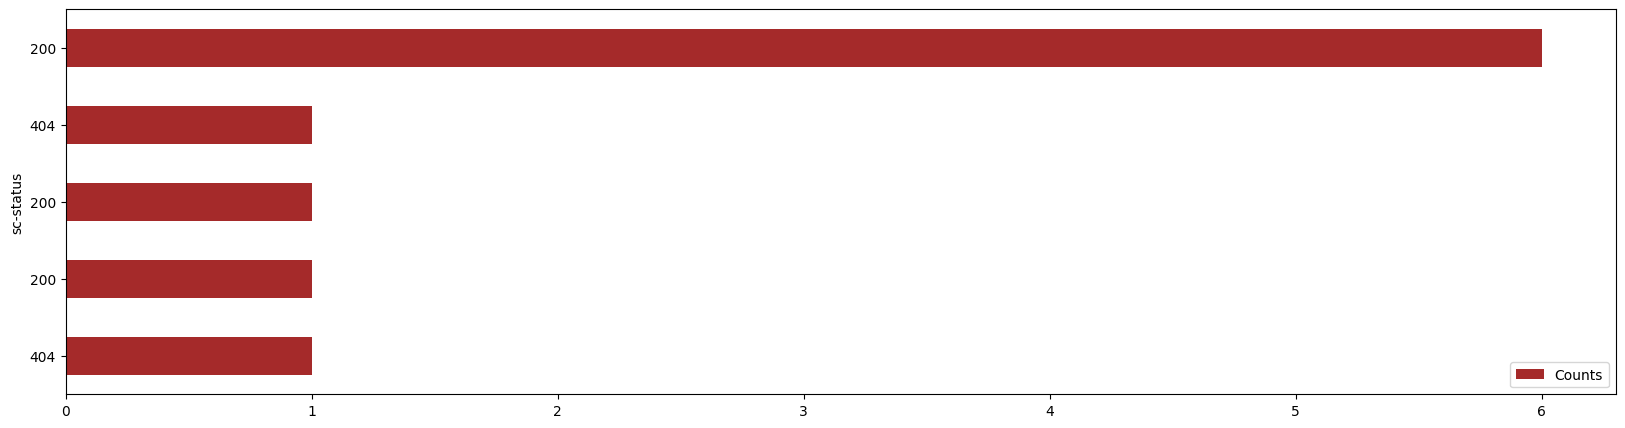

In [ ]:
# Plot
analise7_ip2.sort_values(by=['Counts']).plot(x = 'sc-status',
              y = 'Counts',
              kind = 'barh',
              figsize = (20,5),
              color = 'brown')

In [ ]:
analise7_ip2 = dados[dados['c-ip'].str.contains("45.84.89.130")]
analise7_ip2.head()

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
45294,2022-01-20,14:55:00,57.222.145.109,GET,gwzrmtvs.js,v=728188,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,200,0,0,25
45295,2022-01-20,14:55:00,57.222.145.109,GET,template.css,v=ffjwagua,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,200,0,0,22
45296,2022-01-20,14:55:00,57.222.145.109,GET,zfkvjtbd.js,v=761846,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,200,0,0,22
45297,2022-01-20,14:55:00,57.222.145.109,GET,index.aspx,-,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,301,0,0,23
45300,2022-01-20,14:55:10,57.222.145.109,POST,login.aspx,-,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/index.aspx,401,0,0,22


### Resultado da Análise:

O endereço **c-ip = 45.84.89.130** acessou a página login.aspx **60 vezes** em um curto espaço de tempo, o que indica que um ataque de força bruta foi lançado aqui. Este é o segundo c-ip suspeito.

In [ ]:
analise7_ip2 = df_filtro.loc[df_filtro['c-ip'] == '160.116.57.249'].groupby(pd.Grouper(key = 'cs-uri-stem',
                                                                                 axis = 0))['sc-status'].value_counts().reset_index(name='Counts').head().sort_values(by = "Counts",
                                                                                 ascending = False).head()

<ipython-input-817-5881336d09ac>:1: FutureWarning: Grouper axis keyword is deprecated and will be removed in a future version. To group on axis=1, use obj.T.groupby(...) instead
  analise7_ip2 = df_filtro.loc[df_filtro['c-ip'] == '160.116.57.249'].groupby(pd.Grouper(key = 'cs-uri-stem',


<Axes: xlabel='sc-status'>

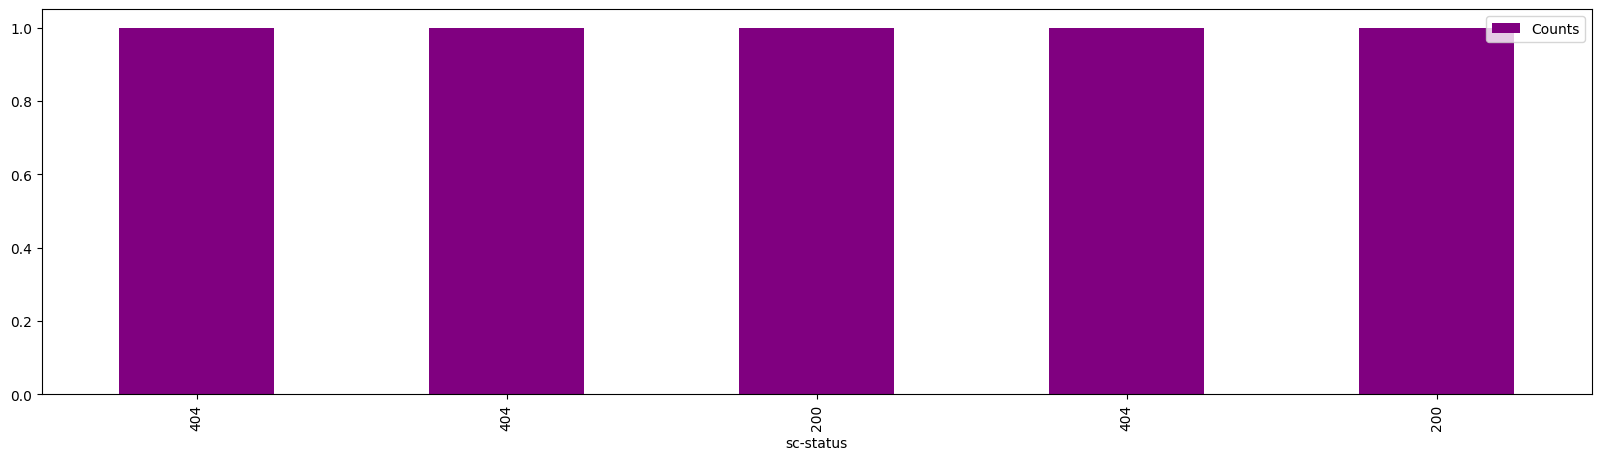

In [ ]:
# Plot
analise7_ip2.plot(x = 'sc-status',
                  y = 'Counts',
                  kind = 'bar',
                  figsize = (20,5),
                  color = 'purple')

Vamos analisar o terceiro IP.

In [ ]:
analise7_ip3 = dados[dados['c-ip'].str.contains("160.116.57.249")]

In [ ]:
analise7_ip3.head()

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
69220,2022-01-30,18:44:00,57.222.145.109,GET,zjqcquyq.css,-,443,-,160.116.57.249,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,404,0,0,25
69221,2022-01-30,18:44:00,57.222.145.109,GET,akyodcgk.css,-,443,-,160.116.57.249,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,404,0,0,22
69222,2022-01-30,18:44:00,57.222.145.109,GET,nnuxmlih.css,-,443,-,160.116.57.249,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,200,0,0,27
69223,2022-01-30,18:44:00,57.222.145.109,GET,index.aspx,-,443,-,160.116.57.249,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,301,0,0,22
69236,2022-01-30,18:44:28,57.222.145.109,POST,login.aspx,-,443,-,160.116.57.249,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/index.aspx,401,0,0,29


In [ ]:
# para o segund ip (c-ip)
analise7_ip3 = df_filtro.loc[df_filtro['c-ip'] == '160.116.57.249'].groupby(pd.Grouper(key = 'cs-uri-stem',
                                                                                     axis = 0))['sc-status'].value_counts().reset_index(name='Counts').head().sort_values(by = "Counts",
                                                                                     ascending = False).head()

<ipython-input-821-b4d327193578>:2: FutureWarning: Grouper axis keyword is deprecated and will be removed in a future version. To group on axis=1, use obj.T.groupby(...) instead
  analise7_ip3 = df_filtro.loc[df_filtro['c-ip'] == '160.116.57.249'].groupby(pd.Grouper(key = 'cs-uri-stem',


<Axes: ylabel='sc-status'>

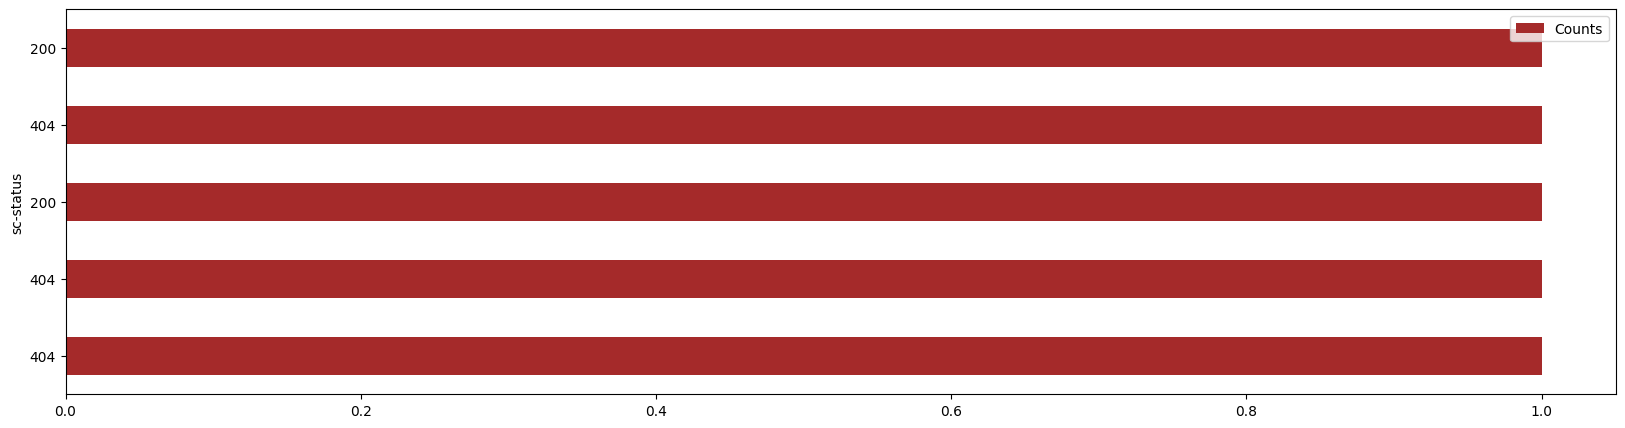

In [ ]:
# Plot
analise7_ip3.sort_values(by=['Counts']).plot(x = 'sc-status',
              y = 'Counts',
              kind = 'barh',
              figsize = (20,5),
              color = 'brown')

### Resultado da Análise:

Mesma conclusão dos dois IPs anteriores. Este é o terceiro c-ip suspeito.

### Análise 8 - Verificando os Arquivos Mais Acessados na Aplicação Web

Vamos analisar os arquivos mais acessados pelo c-ip = 103.211.182.34

In [ ]:
dados['cs-uri-stem'].value_counts()

,count
cs-uri-stem,
transactions.aspx,8998
main.css,6026
index.aspx,6007
template.css,5852
favico.ico,5799
...,...
kwfbltht.css,1
rzutuykd.css,1
ffkcuppc.js,1


In [ ]:
# verificar o porquê dessa lista
analise8 = {"cs-uri-stem": ["login.aspx", "eiownzdh.css", "index.aspx", "login.aspx", "sybwkkcf.css"],
            "Count": [173,1,1,1,1],
            "sc-status": [401,200,301,301,200]}

In [ ]:
df_analise8 = pd.DataFrame(data = analise8)

Vamos resumir esse dataframe em duas partes: acessos com código 401 e outros e então criar um plot.

In [ ]:
# Dataframe consolidado
df = pd.DataFrame({"Count": [173, 4],
                   'sc-status_&_uri_stem': ['401(login.aspx)', 'Outros']},
                  index = ['401(login.aspx)', 'Outros'])

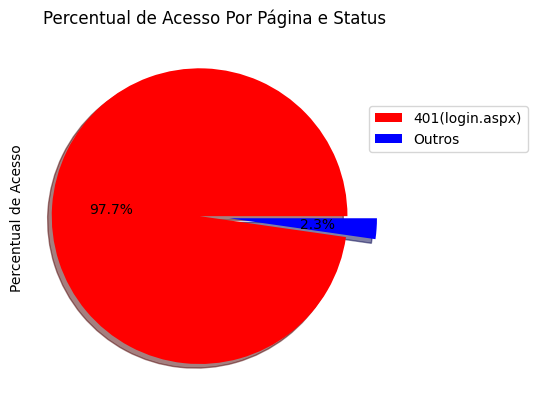

In [ ]:
# Plot
colors = ['red','blue']
ax = df.plot(kind = "pie",
             autopct = '%1.1f%%',
             shadow = True,
             explode = [0.1, 0.1],
             colors = colors,
             y = 'Count',
             legend = True,
             title = 'Percentual de Acesso Por Página e Status',
             ylabel = 'Percentual de Acesso',
             labeldistance = None)

ax.legend(bbox_to_anchor = (0.9, 0.82), loc = 'upper left')

plt.show()

### Resultado da Análise:

A página de login é claramente o alvo dos acessos suspeitos.

## Conclusão

Os endereços IP abaixo apresentaram acessos suspeitos e maliciosos à aplicação web, tentando obter acesso por força bruta.

1. 103.211.182.34
2. 45.84.89.130
3. 160.116.57.249
    
A empresa pode entrar em contato com os provedores desses endereços IP a fim de obter mais detalhes ou mesmo bloquear os endereços.

Here's the data dictionary for the given features of the dataset:

1. `date`: The date of the event.
2. `time`: The time of the event.
3. `s-ip`: The source IP address.
4. `cs-method`: The HTTP request method (e.g., GET, POST).
5. `cs-uri-stem`: The URI stem of the requested resource.
6. `cs-uri-query`: The query string portion of the URI.
7. `s-port`: The source port number.
8. `cs-username`: The username associated with the request (if applicable).
9. `c-ip`: The client IP address.
10. `cs(User-Agent)`: The user-agent string of the client's browser or application.
11. `cs(Referer)`: The referer URL, indicating the page that referred the client to the current page.
12. `sc-status`: The HTTP status code returned by the server.
13. `sc-substatus`: The HTTP substatus code.
14. `sc-win32-status`: The Windows status code.
15. `time-taken`: The time taken to process the request.

This data dictionary provides a description for each feature in your dataset, helping you understand the meaning and purpose of each column.

## Further Analysis

In [ ]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
s-port,70315.0,443.000000,0.000000,443.0,443.0,443.0,443.0,443.0
sc-status,70315.0,225.779307,62.451580,200.0,200.0,200.0,200.0,404.0
sc-substatus,70315.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
sc-win32-status,70315.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
time-taken,70315.0,24.983716,3.163987,20.0,22.0,25.0,28.0,30.0


In [ ]:
dados[['date','time','time-taken']]

,date,time,time-taken
0,2022-01-01,00:58:33,23
1,2022-01-01,00:58:33,21
2,2022-01-01,00:58:33,26
3,2022-01-01,00:58:33,21
4,2022-01-01,00:58:49,20
...,...,...,...
70310,2022-01-30,23:48:57,30
70311,2022-01-30,23:49:09,22
70312,2022-01-30,23:49:09,22
70313,2022-01-30,23:49:09,24


<Axes: ylabel='time-taken'>

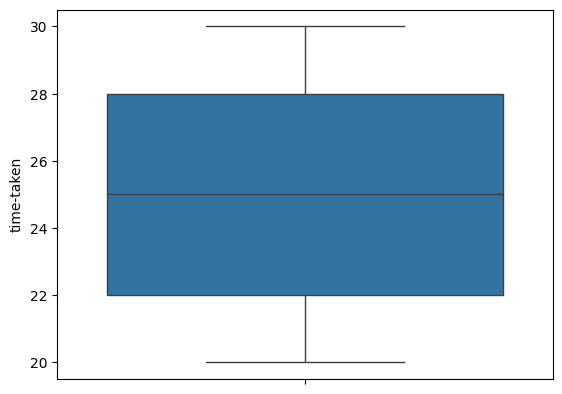

In [ ]:
sns.boxplot(data=dados,y='time-taken')

In [ ]:
dados.columns

Index(['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

<Axes: xlabel='sc-status', ylabel='time-taken'>

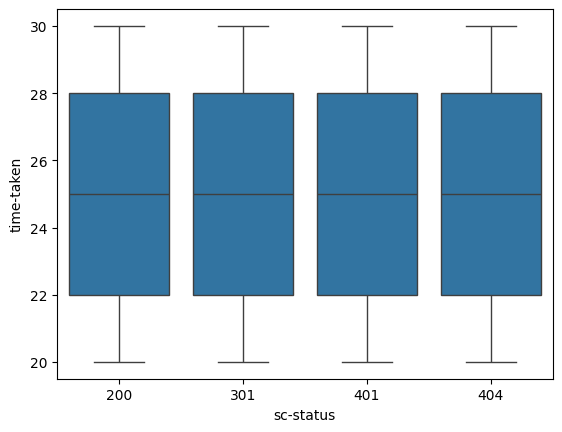

In [ ]:
sns.boxplot(data=dados,y='time-taken',x='sc-status')

<Axes: xlabel='sc-substatus', ylabel='time-taken'>

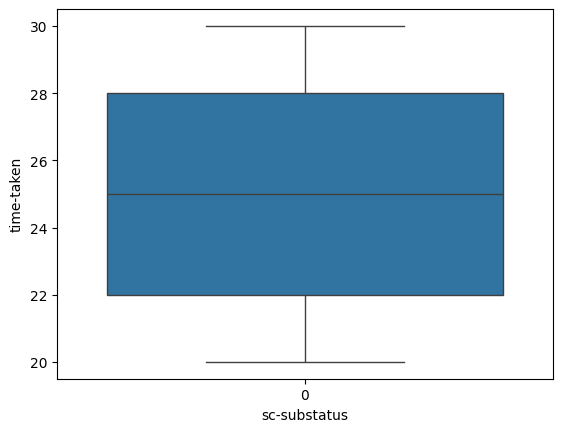

In [ ]:
sns.boxplot(data=dados,y='time-taken',x='sc-substatus')

<Axes: xlabel='sc-win32-status', ylabel='time-taken'>

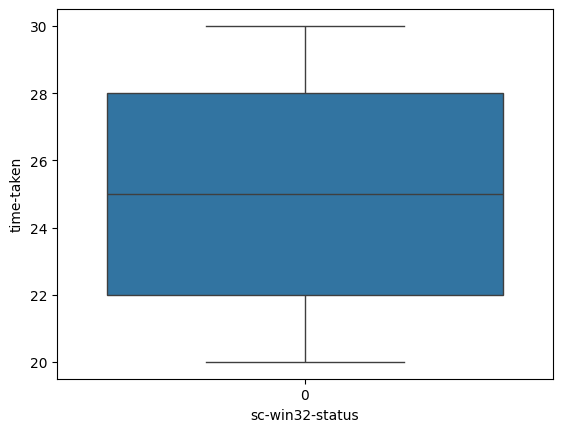

In [ ]:
sns.boxplot(data=dados,y='time-taken',x='sc-win32-status')

In the context of cybersecurity or network logs, the **"source IP"** (`s-ip`) refers to the IP address of the device or entity that initiated the network communication or activity. It represents the origin or sender of the network traffic. The source IP address can provide valuable information for identifying the source of network attacks, analyzing traffic patterns, and troubleshooting network issues.

In [ ]:
# source ip. Just one
dados['s-ip'].value_counts()

,count
s-ip,
57.222.145.109,70315


In [ ]:
# source ip. Just one
dados['cs-method'].value_counts()

,count
cs-method,
GET,67202
POST,3113


In the context of cybersecurity or web server logs, the fields 'cs-uri-stem' and 'cs-uri-query' represent different parts of a Uniform Resource Identifier (URI) or URL:

1. **cs-uri-stem**: This field typically represents the path component of the URI. It includes the part of the URL that comes after the domain name and before any query parameters. For example, in the URL "https://example.com/path/to/resource", the 'cs-uri-stem' would be "/path/to/resource".

2. **cs-uri-query**: This field represents the query component of the URI. It includes any parameters or data that are appended to the URL **after a question mark (?)**. These parameters are often used to **pass information to web applications**. For example, in the URL "https://example.com/search?q=term", the 'cs-uri-query' would be **"q=term"**, indicating a search query parameter with the value "term".

**In summary, 'cs-uri-stem' represents the path part of the URL, while 'cs-uri-query' represents any additional query parameters appended to the URL.** These fields are commonly found in web server logs and can provide insights into the specific resources accessed and actions performed by users or attackers.

In [ ]:
# source ip. Just one
dados['cs-uri-stem'].value_counts()

,count
cs-uri-stem,
transactions.aspx,8998
main.css,6026
index.aspx,6007
template.css,5852
favico.ico,5799
...,...
kwfbltht.css,1
rzutuykd.css,1
ffkcuppc.js,1


In [ ]:
# source ip. Just one
dados['cs-uri-query'].value_counts()

,count
cs-uri-query,
-,49296
page=2,3655
page=1,2005
page=3,1318
page=4,993
...,...
v=gqlywqvt,1
v=916026,1
v=ndfdfitv,1


In the context of network communication, particularly in the Transmission Control Protocol (**TCP**), the source port refers to the **port number used by the originating sender or client to establish a connection with a destination server or service**.

In the provided list of features, the field 's-port' likely represents the source port. It indicates the port number from which the network traffic originated. This information is crucial for **network communication**, as it helps the receiving server identify the appropriate service or application to which the incoming data should be directed.

**Source ports are randomly selected by the client's operating system when initiating a connection**. They are ephemeral and typically assigned dynamically from a predefined range of port numbers. The combination of the source IP address and source port uniquely identifies the origin of the network communication, allowing for bidirectional communication between network hosts.

In [ ]:
# s-port. Just one
dados['s-port'].value_counts()

,count
s-port,
443,70315


In [ ]:
# source ip. Just one
dados['cs-username'].value_counts()

,count
cs-username,
-,27500
hl146973,139
od539251,135
zc779181,112
rv266184,102
...,...
ya703933,9
ap438020,9
wv957138,9


In the provided list of features, the field 'c-ip' likely represents the Client IP address. This field refers to the IP address of the client or the originating device that initiated the network communication or made the request to the server.

The Client IP address is essential in network communication as it identifies the source or origin of the communication. It allows servers to know where to send the response or how to route the incoming data packets. In cybersecurity and network analysis, analyzing client IP addresses can provide insights into the source of potential threats, suspicious activities, or unauthorized access attempts.

In [ ]:
# source ip. Just one
dados['c-ip'].value_counts()

,count
c-ip,
103.211.182.34,244
217.15.114.98,144
82.206.244.38,143
185.97.213.168,141
16.8.69.88,139
...,...
194.72.55.28,20
81.199.150.213,20
16.2.128.199,20


The field 'cs(User-Agent)' typically represents the user-agent string of the client's browser or application. **The user-agent string is a piece of information sent by the client's browser or application as part of an HTTP request to identify itself to the server**.

The user-agent string typically includes details such as the name and **version of the browser or application**, **the operating system it's running on, and other relevant information about the client device**. This information is often used by servers to tailor their responses or content based on the capabilities or preferences of the client.

In cybersecurity and network analysis, analyzing user-agent strings can help identify the types of devices and software accessing a system or service. It can also be used to **detect suspicious or malicious activity**, such as attempts to exploit vulnerabilities in specific software versions.

In [ ]:
#
dados['cs(User-Agent)'].value_counts()

,count
cs(User-Agent),
"Mozilla/5.0+(iPhone;+CPU+iPhone+OS+9_0+like+Mac+OS+X)+AppleWebKit/601.1.46+(KHTML,+like+Gecko)+Version/9.0+Mobile/13A344+Safari+E7FBAFSafari+9",986
Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7.0;+.NET4.0C;+.NET4.0E;+.NET+CLR+2.0.50727;+.NET+CLR+3.0.30729;+.NET+CLR+3.5.30729;+rv:11.0)+like+Gecko,929
"Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+AppleWebKit/537.36+(KHTML,+like+Gecko)+Chrome/79.0.3945.130+Safari/537.36",923
"Mozilla/5.0+(iPhone;+CPU+iPhone+OS+13_1_2+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML,+like+Gecko)+Version/13.0.1+Mobile/15E148+Safari/604+1+Safari+13",923
"Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+AppleWebKit/537.36+(KHTML,+like+Gecko)+Chrome/67.0.3396.99+Safari/537.36",913
Mozilla/4.0+(compatible;+MSIE+9.0;+Windows+NT+6.1),842
"Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+AppleWebKit/537.36+(KHTML,+like+Gecko)+Chrome/91.0.4472.124+Safari/537.36",838
Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1;+.NET+CLR+1.1.4322;+InfoPath.1),800
Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1;+.NET+CLR+1.1.4322;+InfoPath.1;+.NET+CLR+2.0.50727),786


The field 'cs(Referer)' typically represents the referer URL, which indicates the page that referred the client to the current page.

When a client makes a request to a server, it often includes the referer URL in the HTTP header to inform the server of the URL of the previous web page from which the client navigated. This information can be useful for web analytics, tracking user navigation patterns, and understanding how users arrive at a particular page on a website.

In cybersecurity and network analysis, analyzing the referer URLs can provide insights into the sources of traffic and help identify any unusual or suspicious patterns, such as unexpected referral sources or attempts to exploit vulnerabilities by manipulating the referer information.

In [ ]:
# Retirando "-" de "cs(Referer)"
dados['cs(Referer)'].value_counts()

,count
cs(Referer),
https://bankofpunk.local/transactions.aspx,23250
https://bankofpunk.local/index.aspx,18105
https://bankofpunk.local/login.aspx,13552
https://bankofpunk.local/account_status.aspx,6288
-,5952
https://bankofpunk.local/transfer.aspx,1774
https://bankofpunk.local/changepassword.aspx,534
https://bankofpunk.local/faq.aspx,428
https://bankofpunk.local/transfer_complete.aspx,298


In [ ]:
#dados = dados[dados['cs(Referer)']!="-"]

The field 'sc-status' typically represents the HTTP status code returned by the server in response to a client's request.

HTTP status codes are three-digit numbers that indicate the outcome of an HTTP request. They provide information about whether the request was successful, encountered an error, or requires further action. Some common HTTP status codes include:

- 2xx: Success - Indicates that the request was successful.
- 3xx: Redirection - Indicates that further action is needed to complete the request.
- 4xx: Client Error - Indicates that there was an error on the client's side.
- 5xx: Server Error - Indicates that there was an error on the server's side.

Analyzing the 'sc-status' field can help in monitoring server performance, troubleshooting errors, and identifying any issues with the client-server communication. It is particularly useful for understanding the response behavior of web servers and diagnosing potential issues with web applications or services.

In [ ]:
#
dados['sc-status'].value_counts()

,count
sc-status,
200,59070
404,5909
301,4653
401,683


The 'sc-substatus' field typically represents the HTTP substatus code, which provides additional information about the HTTP status code returned by the server.

While the main HTTP status code (represented by the 'sc-status' field) categorizes the outcome of the request broadly, the substatus code provides more specific details or context related to the response. It can help in diagnosing issues more precisely by offering finer-grained information about the server's response.

For example, in the case of a server error (5xx status code), the substatus code might indicate the specific type of error encountered on the server, such as a database connection failure, timeout, or internal server error.

Analyzing the 'sc-substatus' field alongside the main status code ('sc-status') can provide a deeper understanding of server behavior and aid in troubleshooting and resolving issues related to web applications or services.

In [ ]:
#
dados['sc-substatus'].value_counts()

,count
sc-substatus,
0,70315


The 'sc-win32-status' field typically represents the Windows status code associated with the server response. This status code is specific to Windows-based web servers and provides additional information about the outcome of the request, particularly from the perspective of the server's operating system.

Similar to the HTTP status code and substatus code, the 'sc-win32-status' code helps in diagnosing and troubleshooting issues related to server responses. It may provide insights into underlying system-level issues or errors encountered during the processing of the request on the Windows server.

For example, the 'sc-win32-status' code might indicate issues such as file system errors, permission problems, network connectivity issues, or other system-related errors encountered by the server while handling the request.

Analyzing the 'sc-win32-status' field alongside the HTTP status codes ('sc-status') and substatus codes ('sc-substatus') can provide a comprehensive view of server behavior and aid in diagnosing and resolving issues in Windows-based web server environments.

In [ ]:
#
dados['sc-win32-status'].value_counts()

,count
sc-win32-status,
0,70315


The 'time-taken' field typically represents the duration or time taken by the server to process the request, measured in milliseconds. It indicates the elapsed time between the server receiving the request and completing the processing, including any time spent waiting for resources, executing scripts, accessing databases, and generating the response.

This metric is crucial for assessing the performance and responsiveness of the web server. A shorter 'time-taken' value indicates faster processing and better server performance, while a longer duration may suggest potential bottlenecks or inefficiencies in the server's processing pipeline.

Monitoring and analyzing the 'time-taken' values across various requests can help identify performance issues, optimize server configurations, and improve the overall responsiveness of the web application. Additionally, it assists in identifying trends, anomalies, or patterns in request processing times, enabling proactive measures to maintain optimal server performance and user experience.

In [ ]:
#
dados['time-taken'].value_counts()

,count
time-taken,
26,6532
21,6511
20,6492
27,6421
23,6399
25,6370
30,6364
28,6334
24,6314


A machine learning problem using the provided dataset, which appears to be web server log data. Here's a potential problem statement and some ideas for features and target variables:

**Problem Statement**:
Predict whether a web server request will result in a successful response (e.g., HTTP status code 200) or an unsuccessful response (e.g., HTTP status code 400 or higher).

**Features**:
1. **Date and Time**: Extract day of the week, hour of the day, etc., from the timestamp.
2. **Source IP Address (s-ip)**: One-hot encoded categorical variable representing the source IP address.
3. **Client IP Address (c-ip)**: One-hot encoded categorical variable representing the client IP address.
4. **Request Method (cs-method)**: One-hot encoded categorical variable representing the HTTP request method (e.g., GET, POST).
5. **Request URI Stem (cs-uri-stem)**: One-hot encoded categorical variable representing the requested URI stem.
6. **Request URI Query (cs-uri-query)**: One-hot encoded categorical variable representing the requested URI query.
7. **Source Port (s-port)**: One-hot encoded categorical variable representing the source port.
8. **User-Agent String (cs(User-Agent))**: One-hot encoded categorical variable representing the user-agent string of the client's browser or application.
9. **Referer URL (cs(Referer))**: One-hot encoded categorical variable representing the referer URL.
10. **Time Taken (time-taken)**: Numerical variable representing the time taken to process the request.

**Target Variable**:
- **Response Status (sc-status)**: Binary variable indicating whether the server response was successful (e.g., 1 for HTTP status code 200) or unsuccessful (e.g., 0 for HTTP status code 400 or higher).

**ML Approach**:
This problem can be framed as a binary classification task, where the goal is to predict whether a web server request will result in a successful response or not based on the provided features.

With this setup, you can apply various machine learning algorithms such as logistic regression, random forest, or gradient boosting classifiers to predict the target variable based on the extracted features. The model can be trained and evaluated using standard techniques such as cross-validation and performance metrics like accuracy, precision, recall, and F1-score. Additionally, you can explore techniques for feature selection, hyperparameter tuning, and model interpretation to improve the model's performance and interpretability.

# features: 'cs-method' (Request Method: POST or GET); 'cs-uri-query': one-hot encoded categorical variable representing the requested URI query; 'cs-uri-stem': one-hot encoded categorical variable representing the requested URI stem; 'time-taken': numerical variable representing the time taken to process the request.

In [ ]:
dados['sc-status'].value_counts()

,count
sc-status,
200,59070
404,5909
301,4653
401,683


In [ ]:
df = dados.copy()

In [ ]:
df.columns

Index(['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

In [ ]:
df['sc-status'].value_counts()

,count
sc-status,
200,59070
404,5909
301,4653
401,683


In [ ]:
# if status is 200 normal, else error or stg like
df['response'] = df['sc-status'].apply(lambda x: 0 if x in [200] else 1)

In [ ]:
df['response'].value_counts(normalize=True)

,proportion
response,
0,0.840077
1,0.159923


In [ ]:
df['cs(Referer)'].value_counts()

,count
cs(Referer),
https://bankofpunk.local/transactions.aspx,23250
https://bankofpunk.local/index.aspx,18105
https://bankofpunk.local/login.aspx,13552
https://bankofpunk.local/account_status.aspx,6288
-,5952
https://bankofpunk.local/transfer.aspx,1774
https://bankofpunk.local/changepassword.aspx,534
https://bankofpunk.local/faq.aspx,428
https://bankofpunk.local/transfer_complete.aspx,298


In [ ]:
df.columns

Index(['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken',
       'response'],
      dtype='object')

### Feature Engineering the Date

In [ ]:
# ordenando pela data
df=df.sort_values(by=['date'])
# criando dia, mês, dia do mês e ano como atributos
df['day']=pd.to_datetime(df['date']).dt.day
df['month']=pd.to_datetime(df['date']).dt.month
df['dayofweek']=pd.to_datetime(df['date']).dt.dayofweek
df['year']=pd.to_datetime(df['date']).dt.year

In [ ]:
df.columns

Index(['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken',
       'response', 'day', 'month', 'dayofweek', 'year'],
      dtype='object')

In [ ]:
df = df[['cs-method','cs-uri-query','cs-uri-stem','cs(Referer)',
'time-taken','response','day', 'month', 'dayofweek', 'year']].reset_index(drop=True)

In [ ]:
df

,cs-method,cs-uri-query,cs-uri-stem,cs(Referer),time-taken,response,day,month,dayofweek,year
0,GET,-,smhirsxw.css,https://bankofpunk.local/index.aspx,23,0,1,1,5,2022
1,GET,-,stpqnyeq.css,https://bankofpunk.local/login.aspx,20,0,1,1,5,2022
2,GET,-,apagfbvj.css,https://bankofpunk.local/login.aspx,26,0,1,1,5,2022
3,GET,-,login.aspx,https://bankofpunk.local/index.aspx,25,0,1,1,5,2022
4,GET,-,twgmdezw.css,https://bankofpunk.local/index.aspx,28,0,1,1,5,2022
...,...,...,...,...,...,...,...,...,...,...
70310,GET,page=2,transactions.aspx,https://bankofpunk.local/account_status.aspx,26,0,30,1,6,2022
70311,GET,-,rktoveqb.css,https://bankofpunk.local/transactions.aspx,20,1,30,1,6,2022
70312,GET,page=1,transactions.aspx,https://bankofpunk.local/transactions.aspx,26,0,30,1,6,2022
70313,GET,-,account_status.aspx,https://bankofpunk.local/login.aspx,23,0,30,1,6,2022


In [ ]:
# Separa X e Y
X = df.drop(columns=['response'])
y = df['response']

In [ ]:
X.head(5)

,cs-method,cs-uri-query,cs-uri-stem,cs(Referer),time-taken,day,month,dayofweek,year
0,GET,-,smhirsxw.css,https://bankofpunk.local/index.aspx,23,1,1,5,2022
1,GET,-,stpqnyeq.css,https://bankofpunk.local/login.aspx,20,1,1,5,2022
2,GET,-,apagfbvj.css,https://bankofpunk.local/login.aspx,26,1,1,5,2022
3,GET,-,login.aspx,https://bankofpunk.local/index.aspx,25,1,1,5,2022
4,GET,-,twgmdezw.css,https://bankofpunk.local/index.aspx,28,1,1,5,2022


In [ ]:
# Feature Engineering
X['cs-uri-total'] = X['cs-uri-query'] + X['cs-uri-stem']

In [ ]:
# Dropping Correlated Columns
X = X.drop(columns=['cs-uri-query','cs-uri-stem'])

In [ ]:
# Splitting into Training and Testing Sets
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.33, shuffle=False)

In [ ]:
"""
# Concatenate text columns into a single column
def concatenate_text_columns(df):
    return df.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Pipeline
text_pipeline = make_pipeline(
    FunctionTransformer(concatenate_text_columns, validate=False),
    TfidfVectorizer(stop_words='english')
)

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_pipeline, ['cs-method','cs-uri-total','cs(Referer)']),
         #('numeric', numeric_pipeline, ['numeric_column']),
    ],
    remainder='passthrough'
)
"""

"\n# Concatenate text columns into a single column\ndef concatenate_text_columns(df):\n    return df.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)\n\n# Pipeline\ntext_pipeline = make_pipeline(\n    FunctionTransformer(concatenate_text_columns, validate=False),\n    TfidfVectorizer(stop_words='english')\n)\n\n# Column Transformer\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('text', text_pipeline, ['cs-method','cs-uri-total','cs(Referer)']),\n         #('numeric', numeric_pipeline, ['numeric_column']),\n    ],\n    remainder='passthrough'\n)\n"

# Text and Numeric Preprocessing Pipelines Documentation
Version: 1.0
Last Updated: January 18, 2025

## Overview
This document outlines the design and implementation of a robust preprocessing system that handles both text and numeric features in machine learning pipelines. The system is built using scikit-learn's Pipeline and ColumnTransformer components, providing a scalable and maintainable solution for feature engineering.

## Architecture

### Core Components
1. Text Pipeline
2. Numeric Pipeline
3. Combined Preprocessor

## Detailed Component Specifications

### Text Pipeline

#### Purpose
Transforms multiple text columns into a unified TF-IDF representation while handling various edge cases and data quality issues.

#### Key Features
- Robust text concatenation with error handling
- N-gram support (unigrams and bigrams)
- Automated removal of high and low frequency terms
- Unicode accent stripping
- Missing value handling

#### Implementation Details
```python
text_pipeline = Pipeline([
    ('concatenate', FunctionTransformer(concatenate_text_columns)),
    ('tfidf', TfidfVectorizer(
        stop_words='english',
        min_df=2,
        max_df=0.95,
        ngram_range=(1, 2)
    ))
])
```

#### Design Decisions
1. **Concatenation Strategy**:
   - Uses space-based joining instead of other delimiters
   - Implements safe type conversion to handle mixed data types
   - Strips whitespace to prevent token artifacts

2. **TF-IDF Parameters**:
   - min_df=2: Removes rare terms that appear in < 2 documents
   - max_df=0.95: Removes overused terms appearing in > 95% of documents
   - ngram_range=(1, 2): Captures phrase patterns while maintaining computational efficiency

### Numeric Pipeline

#### Purpose
Standardizes numeric features while handling missing values and outliers.

#### Key Features
- Median-based missing value imputation
- Robust Scaler normalization, which is proper for data with outliers
- Automatic handling of sparse data

#### Implementation Details
```python
numeric_pipeline = Pipeline([
    ('imputer', FunctionTransformer(handle_numeric_missing)),
    ('scaler', RobustScaler())
])
```

#### Design Decisions
1. **Imputation Strategy**:
   - Uses median instead of mean to handle skewed distributions
   - Performs imputation before scaling to prevent data leakage
   - Maintains column-wise statistics for consistent transformation

2. **Scaling Approach**:
   - Implements robust scaler normalization for compatibility with various ML algorithms
   - Handles outliers through Quantiles

## Combined Preprocessor

### Architecture Benefits
1. **Modularity**: Each pipeline can be modified independently
2. **Maintainability**: Clear separation of concerns between text and numeric processing
3. **Scalability**: Easy to add new features or modify existing transformations
4. **Reproducibility**: Consistent application of transformations across training and test sets

### Usage Guidelines

#### Training Phase
```python
preprocessor = create_preprocessor(text_columns, numeric_columns)
X_train_transformed = preprocessor.fit_transform(X_train)
```

#### Inference Phase
```python
X_test_transformed = preprocessor.transform(X_test)
```

### Best Practices
1. **Data Validation**:
   - Verify column names and types before processing
   - Check for unexpected missing value patterns
   - Monitor frequency distributions of text features

2. **Performance Optimization**:
   - Use sparse matrices for text features when possible
   - Monitor memory usage with large datasets
   - Consider batch processing for very large datasets

3. **Model Integration**:
   - Include preprocessor in the full model pipeline
   - Use cross-validation to prevent data leakage
   - Save fitted preprocessor with model artifacts

## Error Handling and Edge Cases

### Text Processing
- Handles NULL values gracefully
- Manages mixed data types through safe conversion
- Processes malformed Unicode characters
- Handles empty strings and whitespace

### Numeric Processing
- Deals with infinity values
- Manages string values in numeric columns
- Handles missing value patterns
- Processes outliers effectively

## Performance Considerations

### Memory Usage
- Text pipeline may create sparse matrices
- Numeric pipeline maintains dense arrays
- Combined preprocessor optimizes memory based on data characteristics

### Computational Efficiency
- Vectorized operations for numeric processing
- Efficient text concatenation using filtered joins
- Optimized TF-IDF computation with sparse matrices

## Testing and Validation

### Unit Tests
Create tests for:
- Edge cases in text concatenation
- Missing value handling in numeric pipeline
- Combined pipeline transformation consistency

### Integration Tests
Verify:
- Pipeline behavior with different data types
- Transformation consistency across datasets
- Memory usage with large datasets

## Future Improvements

### Planned Enhancements
1. Add support for custom tokenization
2. Implement feature selection capabilities
3. Add parallel processing for large datasets
4. Enhance outlier detection and handling

### Maintenance Notes
- Monitor scikit-learn version compatibility
- Update documentation with new features
- Maintain test coverage for critical components

## Conclusion
This preprocessing system provides a robust, maintainable, and efficient solution for handling both text and numeric features in machine learning pipelines. Its modular design allows for easy modifications and extensions while maintaining high performance and reliability.

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Improved text concatenation with error handling and type checking
def concatenate_text_columns(df):
    """
    Safely concatenates text columns with proper error handling and type checking.

    Args:
        df (pd.DataFrame): Input dataframe with text columns
    Returns:
        pd.Series: Concatenated text series
    """
    def safe_convert(x):
        if pd.isna(x):
            return ''
        try:
            return str(x).strip()
        except:
            return ''

    return df.apply(lambda x: ' '.join(filter(None, [safe_convert(val) for val in x])), axis=1)

# Handle missing values in numeric columns
def handle_numeric_missing(df):
    """
    Handles missing values in numeric columns using median imputation.

    Args:
        df (pd.DataFrame): Input dataframe with numeric columns
    Returns:
        pd.DataFrame: DataFrame with imputed values
    """
    return df.fillna(df.median())

# Create the text pipeline with improved preprocessing
text_pipeline = Pipeline([
    ('concatenate', FunctionTransformer(concatenate_text_columns, validate=False)),
    ('tfidf', TfidfVectorizer(
        stop_words='english',
        min_df=2,  # Remove terms that appear in less than 2 documents
        max_df=0.80,  # Remove terms that appear in more than 95% of documents
        ngram_range=(2, 3),  # Include unigrams and bigrams
        strip_accents='unicode',
        lowercase=True
    ))
])

# Create the numeric pipeline with scaling
numeric_pipeline = Pipeline([
    ('imputer', FunctionTransformer(handle_numeric_missing, validate=False)),
    ('scaler', RobustScaler())
])

# Create the full preprocessor
def create_preprocessor(text_columns, numeric_columns):
    """
    Creates a preprocessor with both text and numeric pipelines.

    Args:
        text_columns (list): List of text column names
        numeric_columns (list): List of numeric column names
    Returns:
        ColumnTransformer: Combined preprocessor
    """
    return ColumnTransformer(
        transformers=[
            ('text', text_pipeline, text_columns),
            ('numeric', numeric_pipeline, numeric_columns)
        ],
        remainder='drop',  # Drop any columns not explicitly specified
        sparse_threshold=0  # Return dense array instead of sparse
    )

text_cols = ['cs-method','cs-uri-total','cs(Referer)']
numeric_cols = ['time-taken','day','month','dayofweek','year']  # Example numeric columns

# Create the preprocessor
preprocessor = create_preprocessor(text_cols, numeric_cols)

# Fit and transform training data
# X_train_transformed = preprocessor.fit_transform(X_train)

# Transform test data using fitted preprocessor
# X_test_transformed = preprocessor.transform(X_test)

In [ ]:
X_treino.sample(10)

,cs-method,cs(Referer),time-taken,day,month,dayofweek,year,cs-uri-total
43768,GET,https://bankofpunk.local/transactions.aspx,21,19,1,2,2022,page=4transactions.aspx
40902,GET,https://bankofpunk.local/transactions.aspx,28,18,1,1,2022,-main.css
29639,GET,https://bankofpunk.local/transactions.aspx,28,13,1,3,2022,-eqkqiuov.css
1987,GET,-,20,2,1,6,2022,-footer.css
1200,GET,https://bankofpunk.local/account_status.aspx,23,1,1,5,2022,v=tqanzjkjtemplate.css
9741,GET,https://bankofpunk.local/index.aspx,30,5,1,2,2022,v=473151fugidcar.js
9182,GET,https://bankofpunk.local/transactions.aspx,26,5,1,2,2022,-main.css
5952,GET,https://bankofpunk.local/index.aspx,27,3,1,0,2022,-tygkxtzs.css
41395,GET,https://bankofpunk.local/index.aspx,22,18,1,1,2022,-gdgfqowg.css
32770,GET,https://bankofpunk.local/transactions.aspx,21,15,1,5,2022,-logout.aspx


In [ ]:
# Fit e Transform do vetorizador com dados de treino
X_treino_transformed = preprocessor.fit_transform(X_treino)

In [ ]:
# Transform do vetorizador com dados de teste
X_teste_transformed = preprocessor.transform(X_teste)

In [ ]:
X_teste_transformed

array([[0.      , 0.      , 0.      , ..., 0.      , 0.25    , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.25    , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.25    , 0.      ],
       ...,
       [0.434012, 0.434012, 0.      , ..., 0.      , 0.75    , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.75    , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.75    , 0.      ]])

In [ ]:
from pprint import pprint

# Função de cálculo das métricas
def avalia_modelo(model_pred, model_name:str, y_test = y_teste):

    confusion = confusion_matrix(y_test, model_pred)

    accuracy = accuracy_score(y_test,model_pred)
    precision = precision_score(y_test,model_pred)
    recall = recall_score(y_test,model_pred)
    f1_score_list = f1_score(y_test,model_pred)
    auc = roc_auc_score(y_test,model_pred)
    pprint(confusion)
    print(f"Avaliação do Modelo de {model_name}")
    print("--------------------------------------")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1_score_list}")
    print(f"AUC-score: {auc}")
    print("--------------------------------------")

In [ ]:
# Versão 1 do Modelo - Regressão Logística

# Cria o modelo
modelo_v1_lr = LogisticRegression(C=1000.01,max_iter=3000,class_weight={0:1,1:6})

# Treina o modelo
modelo_v1_lr.fit(X_treino_transformed, y_treino)

# Faz previsões com o modelo
v1_lr_pred = modelo_v1_lr.predict(X_teste_transformed)

In [ ]:
# Faz previsões com o modelo
v1_lr_pred_treino = modelo_v1_lr.predict(X_treino_transformed)# Executa a função de avaliação
avalia_modelo(v1_lr_pred_treino, "Regressão Logística",y_treino)

array([[26227, 13479],
       [    3,  7402]])
Avaliação do Modelo de Regressão Logística
--------------------------------------
Accuracy: 0.7138247967565962
Precision: 0.3544849384608017
Recall: 0.999594868332208
F1-score: 0.5233684508237291
AUC-score: 0.830062381529223
--------------------------------------


In [ ]:
# Executa a função de avaliação
avalia_modelo(v1_lr_pred, "Regressão Logística")

array([[12873,  6491],
       [    3,  3837]])
Avaliação do Modelo de Regressão Logística
--------------------------------------
Accuracy: 0.7201344595759351
Precision: 0.3715143299767622
Recall: 0.99921875
F1-score: 0.5416431394692264
AUC-score: 0.8320045412879571
--------------------------------------


In [ ]:
y_teste.value_counts(normalize=True)

,proportion
response,
0,0.834511
1,0.165489


### Another great model, Naive Bayes modeling.

In [ ]:
# Cria o modelo
modelo_vnb = GaussianNB()

# Treina o modelo
modelo_vnb.fit(X_treino_transformed, y_treino)

# Faz previsões com o modelo
v1_nb_pred = modelo_vnb.predict(X_teste_transformed)

In [ ]:
# Faz previsões com o modelo
v1_nb_pred_treino = modelo_v1_lr.predict(X_treino_transformed)# Executa a função de avaliação
avalia_modelo(v1_nb_pred_treino, "Naive Bayes",y_treino)

array([[26227, 13479],
       [    3,  7402]])
Avaliação do Modelo de Naive Bayes
--------------------------------------
Accuracy: 0.7138247967565962
Precision: 0.3544849384608017
Recall: 0.999594868332208
F1-score: 0.5233684508237291
AUC-score: 0.830062381529223
--------------------------------------


In [ ]:
# Executa a função de avaliação
avalia_modelo(v1_nb_pred, "Naive Bayes")

array([[11534,  7830],
       [    8,  3832]])
Avaliação do Modelo de Naive Bayes
--------------------------------------
Accuracy: 0.6622134114807792
Precision: 0.3285885782884582
Recall: 0.9979166666666667
F1-score: 0.4943878209263321
AUC-score: 0.796779031536184
--------------------------------------


In [ ]:
# Versão 2 do Modelo - Árvore de Decisão

# Cria o modelo
modelo_v2_dt = DecisionTreeClassifier(max_depth=3,max_features=2,class_weight={0:1,1:6})

# Treina o modelo
modelo_v2_dt.fit(X_treino_transformed, y_treino)

# Faz previsões com o modelo
v2_dt_pred = modelo_v2_dt.predict(X_teste_transformed)

In [ ]:
# Executa a função de avaliação

avalia_modelo(v2_dt_pred, "Árvore de Decisão")

array([[ 8168, 11196],
       [  764,  3076]])
Avaliação do Modelo de Árvore de Decisão
--------------------------------------
Accuracy: 0.48457162558179623
Precision: 0.2155269058295964
Recall: 0.8010416666666667
F1-score: 0.33966431095406363
AUC-score: 0.6114276707636164
--------------------------------------


In [ ]:
# Versão 3 do Modelo - RandomForest

# Cria o modelo
modelo_v3_rf = RandomForestClassifier(n_estimators=20,max_depth=25)

# Treina o modelo
modelo_v3_rf.fit(X_treino_transformed, y_treino)

# Faz previsões com o modelo
v3_rf_pred = modelo_v3_rf.predict(X_teste_transformed)

In [ ]:
# Executa a função de avaliação
avalia_modelo(v3_rf_pred, "Random Forest")

array([[18991,   373],
       [ 2295,  1545]])
Avaliação do Modelo de Random Forest
--------------------------------------
Accuracy: 0.8850198241682469
Precision: 0.805526590198123
Recall: 0.40234375
F1-score: 0.5366446682875998
AUC-score: 0.6915406004699443
--------------------------------------


- Usar SHAP para explicar o modelo.

In [ ]:
!pip install shap

In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, Dict
from scipy.sparse import issparse

class BinaryShapExplainer:
    def __init__(self, model, preprocessor, input_features: list):
        """
        Initialize SHAP explainer for binary classification.

        Args:
            model: Trained classifier
            preprocessor: Fitted preprocessor (ColumnTransformer)
            input_features: List of original input feature names
        """
        self.model = model
        self.preprocessor = preprocessor
        self.input_features = input_features
        self.explainer = None
        self._get_feature_names()

    def _get_feature_names(self):
        """Extract feature names from the preprocessor pipeline."""
        try:
            # Get the text pipeline
            text_pipeline = self.preprocessor.named_transformers_['text']
            # Get the TF-IDF vectorizer
            tfidf = text_pipeline.named_steps['tfidf']
            # Get TF-IDF feature names
            text_features = tfidf.get_feature_names_out()

            # Combine with any numeric features if present
            if 'numeric' in self.preprocessor.named_transformers_:
                numeric_features = [f"{feat}_scaled" for feat in self.input_features
                                 if feat in self.preprocessor.named_transformers_['numeric']]
                self.feature_names = list(text_features) + numeric_features
            else:
                self.feature_names = list(text_features)

        except Exception as e:
            print(f"Warning: Could not extract feature names: {str(e)}")
            # Fallback to indices
            n_features = self.preprocessor.transform(pd.DataFrame({feat: [''] for feat in self.input_features})).shape[1]
            self.feature_names = [f'feature_{i}' for i in range(n_features)]

    def _make_prediction_function(self):
        """Create a prediction function that handles sparse matrices."""
        def predict_proba(X):
            if issparse(X):
                X = X.toarray()
            return self.model.predict_proba(X)
        return predict_proba

    def fit(self, background_data: pd.DataFrame, n_samples: int = 100):
        """
        Fit the SHAP explainer with background data.

        Args:
            background_data: DataFrame for background distribution
            n_samples: Number of background samples to use
        """
        try:
            # Sample background data if needed
            if len(background_data) > n_samples:
                background_data = background_data.sample(n_samples, random_state=42)

            # Transform background data
            background_transformed = self.preprocessor.transform(background_data)

            # Convert sparse matrix to dense if needed
            if issparse(background_transformed):
                background_transformed = background_transformed.toarray()

            # Initialize explainer with wrapped prediction function
            self.explainer = shap.KernelExplainer(
                lambda x: self.model.predict_proba(x)[:, 1],
                background_transformed,
                #link="logit"
            )

            return self

        except Exception as e:
            print(f"Error during fitting: {str(e)}")
            raise

    def explain_instances(self, instances: pd.DataFrame) -> Tuple[np.ndarray, Dict[str, float]]:
        """
        Generate SHAP values for instances.
        """
        if self.explainer is None:
            raise ValueError("Explainer not fitted. Call fit() first.")

        try:
            # Transform instances
            X_transformed = self.preprocessor.transform(instances)

            # Convert sparse matrix to dense if needed
            if issparse(X_transformed):
                X_transformed = X_transformed.toarray()

            # Calculate SHAP values
            shap_values = self.explainer.shap_values(X_transformed)

            # For binary classification, we take class 1 SHAP values
            if isinstance(shap_values, list):
                shap_values = shap_values[1]

            # Calculate feature importances
            importances = {
                feature: np.abs(shap_values[:, i]).mean()
                for i, feature in enumerate(self.feature_names)
            }

            return shap_values, importances

        except Exception as e:
            print(f"Error during explanation: {str(e)}")
            raise

    def plot_summary(self, instances: pd.DataFrame, max_display: int = 20):
        """
        Create and display SHAP summary plot.
        """
        if self.explainer is None:
            raise ValueError("Explainer not fitted. Call fit() first.")

        try:
            # Transform instances
            X_transformed = self.preprocessor.transform(instances)

            # Convert sparse matrix to dense if needed
            if issparse(X_transformed):
                X_transformed = X_transformed.toarray()

            # Get SHAP values
            shap_values, _ = self.explain_instances(instances)

            # Create summary plot
            plt.figure(figsize=(12, 8))
            shap.summary_plot(
                shap_values,
                X_transformed,
                feature_names=self.feature_names,
                max_display=max_display,
                show=False
            )
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error during plotting: {str(e)}")
            raise

    def plot_feature_importance(self, instances: pd.DataFrame, max_display: int = 20):
        """
        Create and display SHAP feature importance bar plot.
        """
        if self.explainer is None:
            raise ValueError("Explainer not fitted. Call fit() first.")

        try:
            # Transform instances
            X_transformed = self.preprocessor.transform(instances)

            # Convert sparse matrix to dense if needed
            #if issparse(X_transformed):
            #    X_transformed = X_transformed.toarray()

            # Get SHAP values
            shap_values, _ = self.explain_instances(instances)

            # Create importance plot
            plt.figure(figsize=(12, 8))
            shap.plots.violin(shap_values, show=False,
                              feature_names=self.feature_names)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error during plotting: {str(e)}")
            raise

def example_usage(model, preprocessor, X_train, X_test):
    """Example usage of the BinaryShapExplainer."""
    try:
        # Get original feature names from input data
        input_features = list(X_train.columns)

        # Initialize explainer
        explainer = BinaryShapExplainer(
            model=model,
            preprocessor=preprocessor,
            input_features=input_features
        )

        # Fit explainer with background data
        explainer.fit(
            background_data=X_train,
            n_samples=100
        )

        # Get SHAP values and importance scores for a single instance
        instance = X_test.sample(20)  # Take a sample
        shap_values, importances = explainer.explain_instances(instance)

        # Print top feature importance scores
        print("\nTop Feature Importance Scores:")
        for feature, importance in sorted(importances.items(),
                                        key=lambda x: abs(x[1]),
                                        reverse=True)[:]:
            print(f"{feature}: {importance:.4f}")

        plt.figure(figsize=[12,16])

        pd.Series(importances).sort_values().plot(kind='barh')

        plt.title('Feature Importance',size=24)
        plt.xlabel('Importance',size=20)
        plt.ylabel('Feature',size=20)

        plt.xticks(size=14)
        plt.yticks(size=14)

        plt.show()

        # Create visualization plots
        explainer.plot_summary(instance)
        explainer.plot_feature_importance(instance)

        return explainer

    except Exception as e:
        print(f"Error in example usage: {str(e)}")
        raise

# Usage example:
"""
explainer = example_usage(
    model=trained_model,
    preprocessor=fitted_preprocessor,
    X_train=X_train,
    X_test=X_test
)
"""

'\nexplainer = example_usage(\n    model=trained_model,\n    preprocessor=fitted_preprocessor,\n    X_train=X_train,\n    X_test=X_test\n)\n'

  0%|          | 0/20 [00:00<?, ?it/s]


Top Feature Importance Scores:
index aspx https: 0.0559
index aspx: 0.0539
footer css: 0.0473
footer css https: 0.0457
css https bankofpunk: 0.0364
css https: 0.0356
post login: 0.0307
post login aspx: 0.0290
login aspx: 0.0232
js https: 0.0208
js https bankofpunk: 0.0201
account_status aspx: 0.0195
aspx https: 0.0171
aspx https bankofpunk: 0.0161
ico https bankofpunk: 0.0144
favico ico: 0.0140
ico https: 0.0127
transactions aspx: 0.0127
bankofpunk local transactions: 0.0124
favico ico https: 0.0123
local transactions: 0.0120
local transactions aspx: 0.0117
main css https: 0.0117
main css: 0.0114
local index aspx: 0.0094
bankofpunk local index: 0.0090
local index: 0.0082
account_status aspx https: 0.0081
2transactions aspx: 0.0079
2transactions aspx https: 0.0073
page 2transactions aspx: 0.0070
page 2transactions: 0.0068
login aspx https: 0.0065
local login aspx: 0.0062
bankofpunk local login: 0.0059
local login: 0.0053
page 1transactions aspx: 0.0049
page 1transactions: 0.0047
1trans

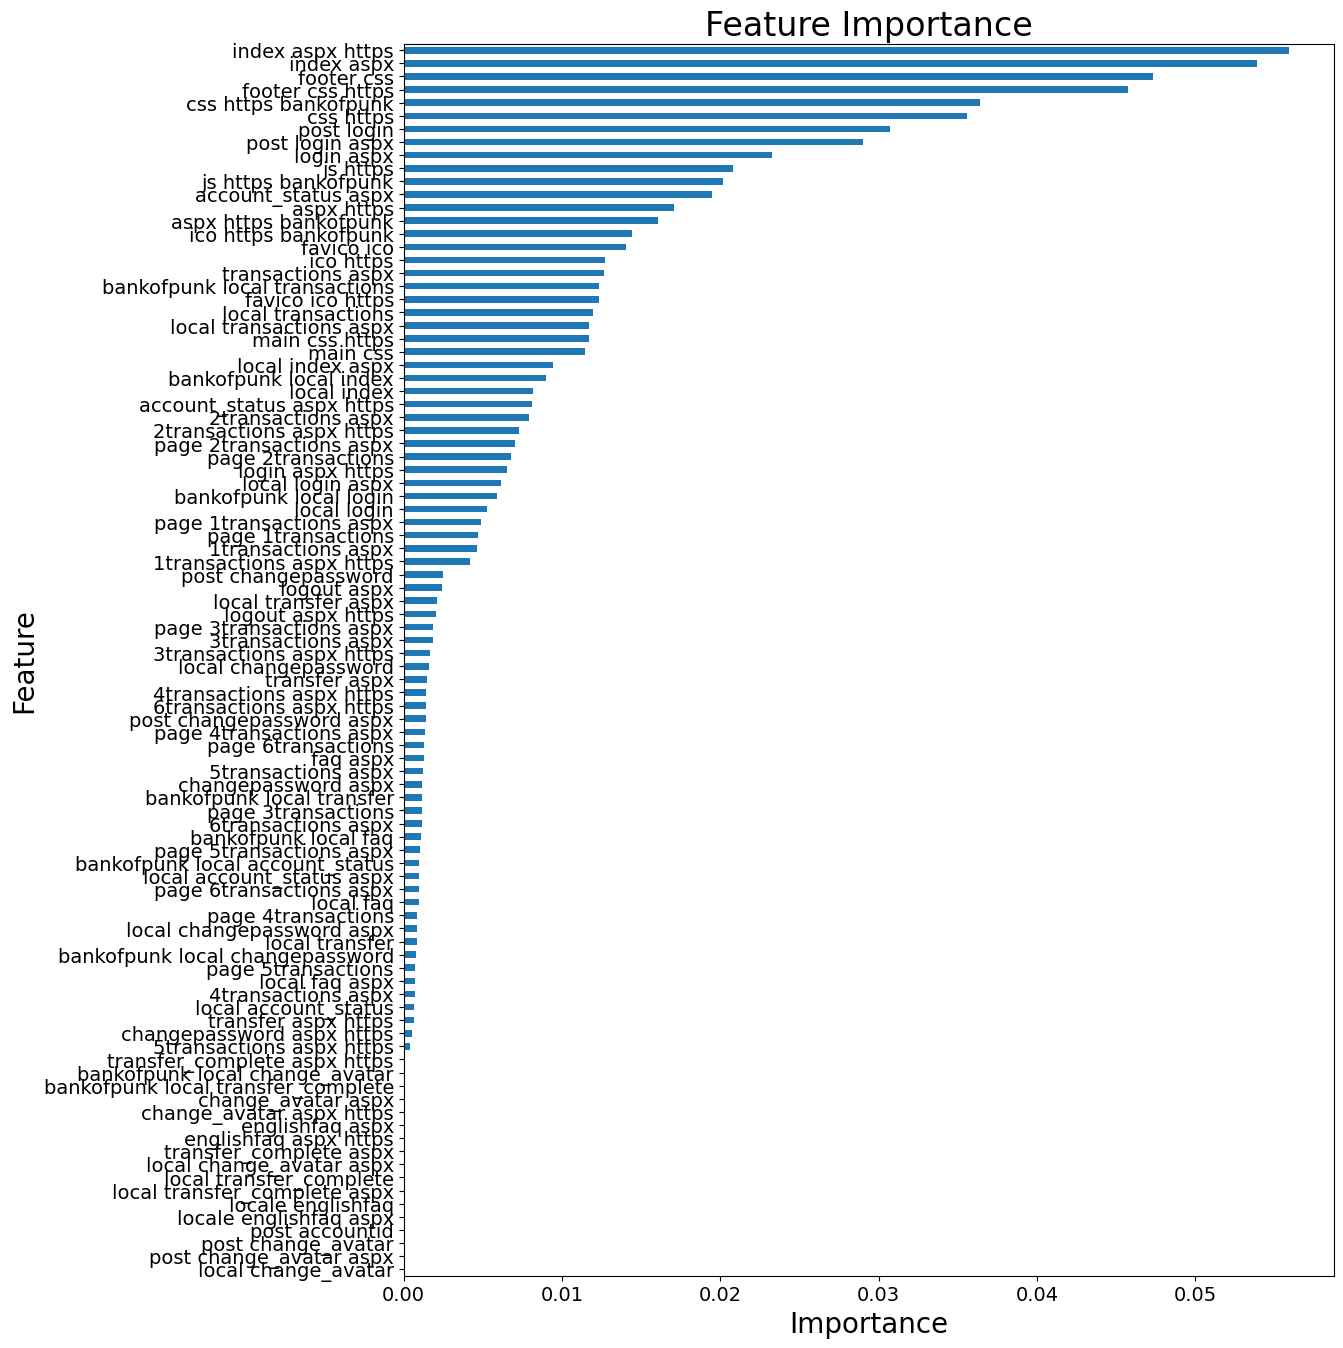

  0%|          | 0/20 [00:00<?, ?it/s]

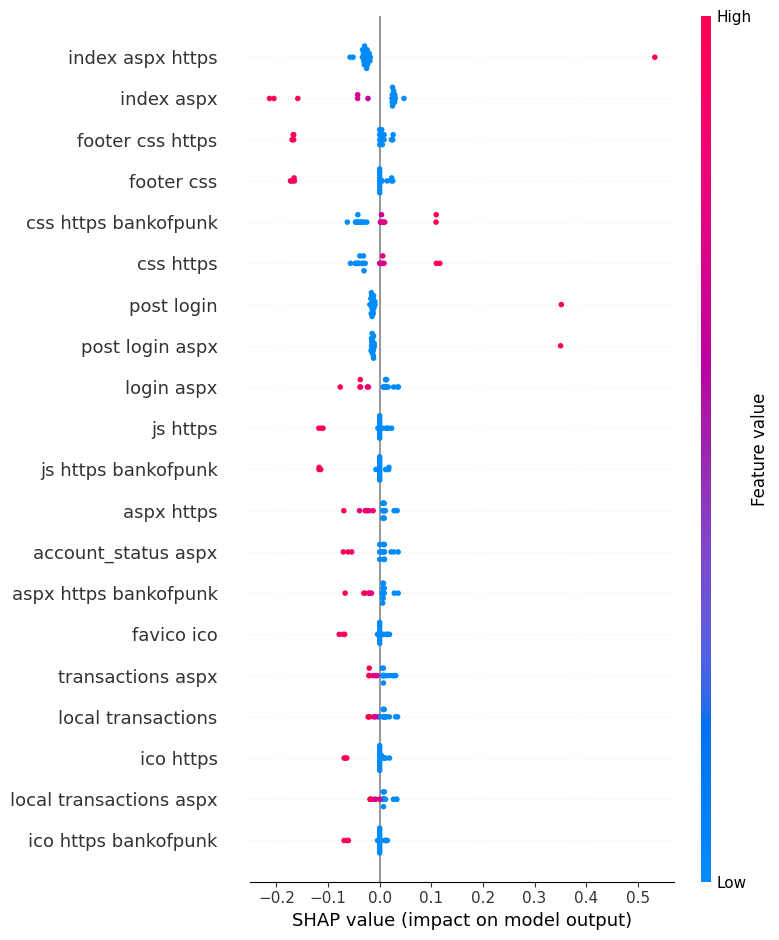

  0%|          | 0/20 [00:00<?, ?it/s]

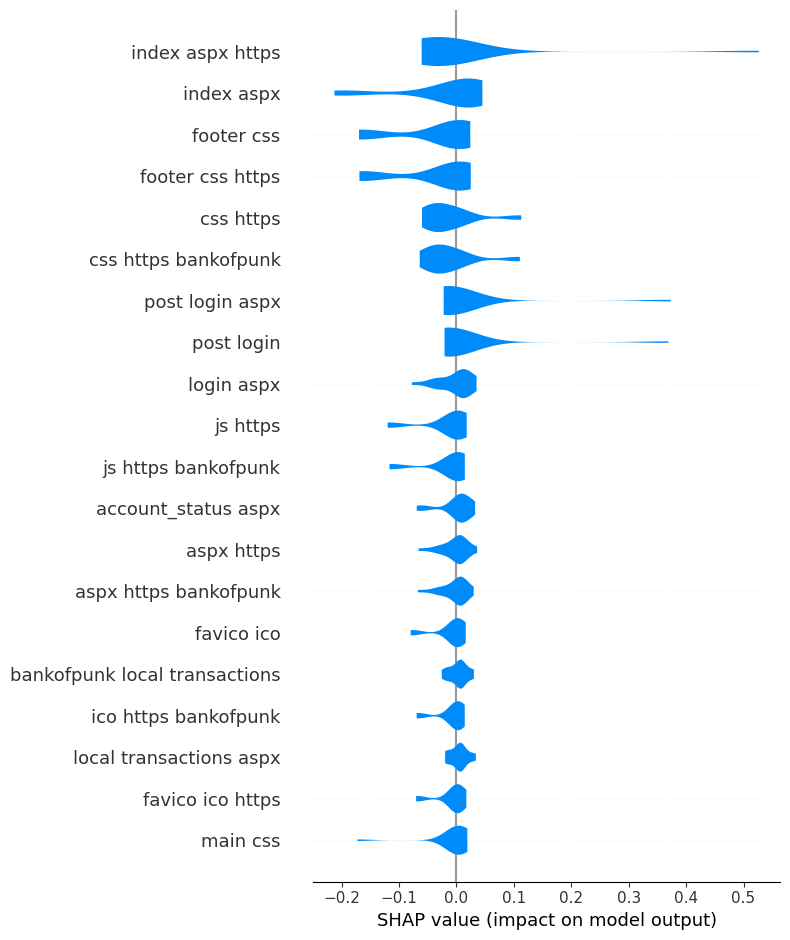

In [ ]:
# First, make sure your model and preprocessor are properly fitted
# Let's say you have:
# - trained_model: your fitted classifier
# - fitted_preprocessor: your fitted preprocessor
# - X_train: training data
# - X_test: test data or instances to explain

explainer = example_usage(
    model=modelo_v1_lr,
    preprocessor=preprocessor,
    X_train=X_treino,
    X_test=X_teste
)